<a href="https://colab.research.google.com/github/Gabrielwissi/IA_Projeto/blob/main/Projeto_minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup Python**

## **Installs**

In [ ]:
pip install -qq optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install -qq imbalanced-learn

In [ ]:
pip install -qq minepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## **Imports**

In [ ]:
# Importações de bibliotecas padrão do Python
import os
import random
import sys
import warnings

# Importações de bibliotecas de terceiros
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

from keras.layers import Dense, LeakyReLU, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier


from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize

from optuna.pruners import MedianPruner

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    pairwise_distances,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
RANDOM_STATE=42

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
pd.set_option('display.max_columns', None)

# Análise Exploratória de Dados

## **Base de dados**

*   Item da lista

*   Item da lista
*   Item da lista


*   Item da lista



In [ ]:
# Carregar o arquivo CSV
!gdown 1fy5feopOTscvyfYjgTF2yJLx44eszV87

Downloading...
From: https://drive.google.com/uc?id=1fy5feopOTscvyfYjgTF2yJLx44eszV87
To: /content/cadastro_terrenos_updated.csv
100% 825k/825k [00:00<00:00, 96.0MB/s]


In [ ]:
raw_data_df = pd.read_csv('cadastro_terrenos_updated.csv', sep=';', encoding='ISO-8859-1')
raw_data_df.head(2)

End  Status  Cidade  Bairro  \
0                Rua Doutor Angelo Vita, 66       0       0       0   
1  AV. CORONEL JOSE PIRES DE ANDRADE Nø 260       0       0       1   

  area_total Latitude Longitude Valor_m2_comercial Valor_comercial  \
0    200,00   -23,53    -46,57            7500,00      1500000,00    
1    500,00   -23,62    -46,61            6200,00      3100000,00    

  Valor_m2_venal Valor_venal Diferenacomercialevenal Padrao  \
0       2850,00   570000,00                930000,00    0,00   
1       1481,00   740500,00               2359500,00    0,00   

  Condicao_comercial Permuta  Cash  zona   OPU   PQA declividade tombamento  \
0               0,00    0,00  1,00  0,00  0,00  0,00        0,00       0,00   
1               0,00    0,00  1,00  1,00  0,00  1,00        0,00       0,00   

  area_contaminada vegetacao distancia_metro estacao_metro linha_metro  \
0             0,00      0,00          448,99          0,00        0,00   
1             0,00      0,00         1859,03          1,00        1,00   

           IPTU ano_exercicio nro_nl data_cadastramento num_condominio  \
0  621430052,00       2024,00   1,00         01/01/2024           00-0   
1  492480082,00       2024,00   1,00         01/01/2024           00-0   

         cep qtde_frente fracao_ideal area_construida area_ocupada  \
0  03069-000        0,00         1,00          162,00        98,00   
1  04294-110        0,00         1,00          220,00       200,00   

  valor_m2_terreno valor_m2_construcao qtde_pavimentos testada_calculo  \
0          2850,00             1951,00            2,00            5,00   
1          1481,00             2065,00            2,00           12,00   

  Tipo_uso Tipo_uso_padrao tipo_terreno obsolencia  
0     0,00            0,00         0,00       0,64  
1     1,00            1,00         0,00       0,42

In [ ]:
raw_data_df.shape

(2653, 44)

## **Verificação de NaN e demais insonsistências na base**

In [ ]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   End                       2653 non-null   object
 1   Status                    2653 non-null   int64 
 2   Cidade                    2653 non-null   int64 
 3   Bairro                    2653 non-null   int64 
 4   area_total                2653 non-null   object
 5   Latitude                  2653 non-null   object
 6   Longitude                 2653 non-null   object
 7   Valor_m2_comercial        2653 non-null   object
 8   Valor_comercial           2653 non-null   object
 9   Valor_m2_venal            2653 non-null   object
 10  Valor_venal               2653 non-null   object
 11  Diferenacomercialevenal  2653 non-null   object
 12  Padrao                    2653 non-null   object
 13  Condicao_comercial        2653 non-null   object
 14  Permuta                 

In [ ]:
raw_data_tratado_df = raw_data_df.copy()

In [ ]:
raw_data_tratado_df.columns

Index(['End', 'Status', 'Cidade', 'Bairro', 'area_total', 'Latitude',
       'Longitude', 'Valor_m2_comercial', 'Valor_comercial', 'Valor_m2_venal',
       'Valor_venal', 'Diferenacomercialevenal', 'Padrao',
       'Condicao_comercial', 'Permuta', 'Cash', 'zona', 'OPU', 'PQA',
       'declividade', 'tombamento', 'area_contaminada', 'vegetacao',
       'distancia_metro', 'estacao_metro', 'linha_metro', 'IPTU',
       'ano_exercicio', 'nro_nl', 'data_cadastramento', 'num_condominio',
       'cep', 'qtde_frente', 'fracao_ideal', 'area_construida', 'area_ocupada',
       'valor_m2_terreno', 'valor_m2_construcao', 'qtde_pavimentos',
       'testada_calculo', 'Tipo_uso', 'Tipo_uso_padrao', 'tipo_terreno',
       'obsolencia'],
      dtype='object')

## **Caracteres especiais**

In [ ]:
# Lista de colunas que precisam de tratamento
colunas_tratar = [
   'area_total',
   'Latitude',
   'Longitude',
   'Valor_m2_comercial',
   'Valor_comercial',
   'Valor_m2_venal',
   'Valor_venal',
   'Diferenacomercialevenal',
   'Padrao',
   'Condicao_comercial',
   'Permuta',
   'Cash',
   'zona',
   'OPU',
   'PQA',
   'declividade',
   'tombamento',
   'area_contaminada',
   'vegetacao',
   'distancia_metro',
   'nro_nl',
   'qtde_frente',
   'fracao_ideal',
   'area_construida',
   'area_ocupada',
   'valor_m2_terreno',
   'valor_m2_construcao',
   'qtde_pavimentos',
   'testada_calculo',
   'Tipo_uso',
   'Tipo_uso_padrao',
   'tipo_terreno',
   'obsolencia'
    ]

# Função para remover caracteres especiais e converter para float
def tratar_coluna(coluna):
    return coluna.replace({'R\$ ': '', '\.': '', ',': '.'}, regex=True).astype(float)

# Aplicar a função em todas as colunas listadas
for coluna in colunas_tratar:
    raw_data_tratado_df[coluna] = tratar_coluna(raw_data_tratado_df[coluna])

# Exibir os primeiros registros para verificar
raw_data_tratado_df.head(2)

End  Status  Cidade  Bairro  \
0                Rua Doutor Angelo Vita, 66       0       0       0   
1  AV. CORONEL JOSE PIRES DE ANDRADE Nø 260       0       0       1   

   area_total  Latitude  Longitude  Valor_m2_comercial  Valor_comercial  \
0       200.0    -23.53     -46.57              7500.0        1500000.0   
1       500.0    -23.62     -46.61              6200.0        3100000.0   

   Valor_m2_venal  Valor_venal  Diferenacomercialevenal  Padrao  \
0          2850.0     570000.0                  930000.0     0.0   
1          1481.0     740500.0                 2359500.0     0.0   

   Condicao_comercial  Permuta  Cash  zona  OPU  PQA  declividade  tombamento  \
0                 0.0      0.0   1.0   0.0  0.0  0.0          0.0         0.0   
1                 0.0      0.0   1.0   1.0  0.0  1.0          0.0         0.0   

   area_contaminada  vegetacao  distancia_metro estacao_metro linha_metro  \
0               0.0        0.0           448.99          0,00        0,00   
1               0.0        0.0          1859.03          1,00        1,00   

           IPTU ano_exercicio  nro_nl data_cadastramento num_condominio  \
0  621430052,00       2024,00     1.0         01/01/2024           00-0   
1  492480082,00       2024,00     1.0         01/01/2024           00-0   

         cep  qtde_frente  fracao_ideal  area_construida  area_ocupada  \
0  03069-000          0.0           1.0            162.0          98.0   
1  04294-110          0.0           1.0            220.0         200.0   

   valor_m2_terreno  valor_m2_construcao  qtde_pavimentos  testada_calculo  \
0            2850.0               1951.0              2.0              5.0   
1            1481.0               2065.0              2.0             12.0   

   Tipo_uso  Tipo_uso_padrao  tipo_terreno  obsolencia  
0       0.0              0.0           0.0        0.64  
1       1.0              1.0           0.0        0.42

In [ ]:
# Lista de colunas que desejo manter
columns_to_keep = [
   'Status',
   'Bairro',
   'area_total',
   'Latitude',
   'Longitude',
   'Valor_m2_comercial',
   'Valor_comercial',
   'Valor_m2_venal',
   'Valor_venal',
   'Diferenacomercialevenal',
   'Padrao',
   'Condicao_comercial',
   'Permuta',
   'Cash',
   'zona',
   'OPU',
   'PQA',
   'declividade',
   'tombamento',
   'area_contaminada',
   'vegetacao',
   'distancia_metro',
   'qtde_frente',
   'fracao_ideal',
   'area_construida',
   'area_ocupada',
   'valor_m2_terreno',
   'valor_m2_construcao',
   'qtde_pavimentos',
   'testada_calculo',
   'Tipo_uso',
   'Tipo_uso_padrao',
   'tipo_terreno',
   'obsolencia'
]

# Criar o novo DataFrame com apenas as colunas selecionadas
novo_raw_data_tratado = raw_data_tratado_df[columns_to_keep]

In [ ]:
# Exibe as primeiras linhas do novo DataFrame
novo_raw_data_tratado.head(2)

Status  Bairro  area_total  Latitude  Longitude  Valor_m2_comercial  \
0       0       0       200.0    -23.53     -46.57              7500.0   
1       0       1       500.0    -23.62     -46.61              6200.0   

   Valor_comercial  Valor_m2_venal  Valor_venal  Diferenacomercialevenal  \
0        1500000.0          2850.0     570000.0                  930000.0   
1        3100000.0          1481.0     740500.0                 2359500.0   

   Padrao  Condicao_comercial  Permuta  Cash  zona  OPU  PQA  declividade  \
0     0.0                 0.0      0.0   1.0   0.0  0.0  0.0          0.0   
1     0.0                 0.0      0.0   1.0   1.0  0.0  1.0          0.0   

   tombamento  area_contaminada  vegetacao  distancia_metro  qtde_frente  \
0         0.0               0.0        0.0           448.99          0.0   
1         0.0               0.0        0.0          1859.03          0.0   

   fracao_ideal  area_construida  area_ocupada  valor_m2_terreno  \
0           1.0            162.0          98.0            2850.0   
1           1.0            220.0         200.0            1481.0   

   valor_m2_construcao  qtde_pavimentos  testada_calculo  Tipo_uso  \
0               1951.0              2.0              5.0       0.0   
1               2065.0              2.0             12.0       1.0   

   Tipo_uso_padrao  tipo_terreno  obsolencia  
0              0.0           0.0        0.64  
1              1.0           0.0        0.42

In [ ]:
# Supondo que o DataFrame seja chamado novo_raw_data_tratado
valores_distintos_por_coluna = novo_raw_data_tratado.nunique()

# Exibe o número de valores distintos para cada coluna
print(valores_distintos_por_coluna)

Status                         2
Bairro                       121
area_total                  1540
Latitude                      43
Longitude                     50
Valor_m2_comercial          1280
Valor_comercial             1790
Valor_m2_venal              1962
Valor_venal                 2572
Diferenacomercialevenal    2617
Padrao                         2
Condicao_comercial             3
Permuta                       15
Cash                          15
zona                          31
OPU                            6
PQA                           13
declividade                    4
tombamento                     2
area_contaminada               2
vegetacao                      2
distancia_metro             2592
qtde_frente                    6
fracao_ideal                  17
area_construida             1169
area_ocupada                 880
valor_m2_terreno            1962
valor_m2_construcao           80
qtde_pavimentos               26
testada_calculo              800
Tipo_uso  

In [ ]:
 novo_raw_data_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Status                    2653 non-null   int64  
 1   Bairro                    2653 non-null   int64  
 2   area_total                2653 non-null   float64
 3   Latitude                  2653 non-null   float64
 4   Longitude                 2653 non-null   float64
 5   Valor_m2_comercial        2653 non-null   float64
 6   Valor_comercial           2653 non-null   float64
 7   Valor_m2_venal            2653 non-null   float64
 8   Valor_venal               2653 non-null   float64
 9   Diferenacomercialevenal  2653 non-null   float64
 10  Padrao                    2653 non-null   float64
 11  Condicao_comercial        2653 non-null   float64
 12  Permuta                   2653 non-null   float64
 13  Cash                      2653 non-null   float64
 14  zona    

In [ ]:
novo_raw_data_tratado.shape

(2653, 34)

In [ ]:
novo_raw_data_tratado = novo_raw_data_tratado.dropna()

In [ ]:
novo_raw_data_tratado.shape

(2653, 34)

In [ ]:
novo_raw_data_tratado.to_csv('cadastro_terrenos_updated_cleaned.csv', index=False)

# **Correlação**

## **Linear**

In [ ]:
correlation_matrix = novo_raw_data_tratado.corr(method='pearson')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


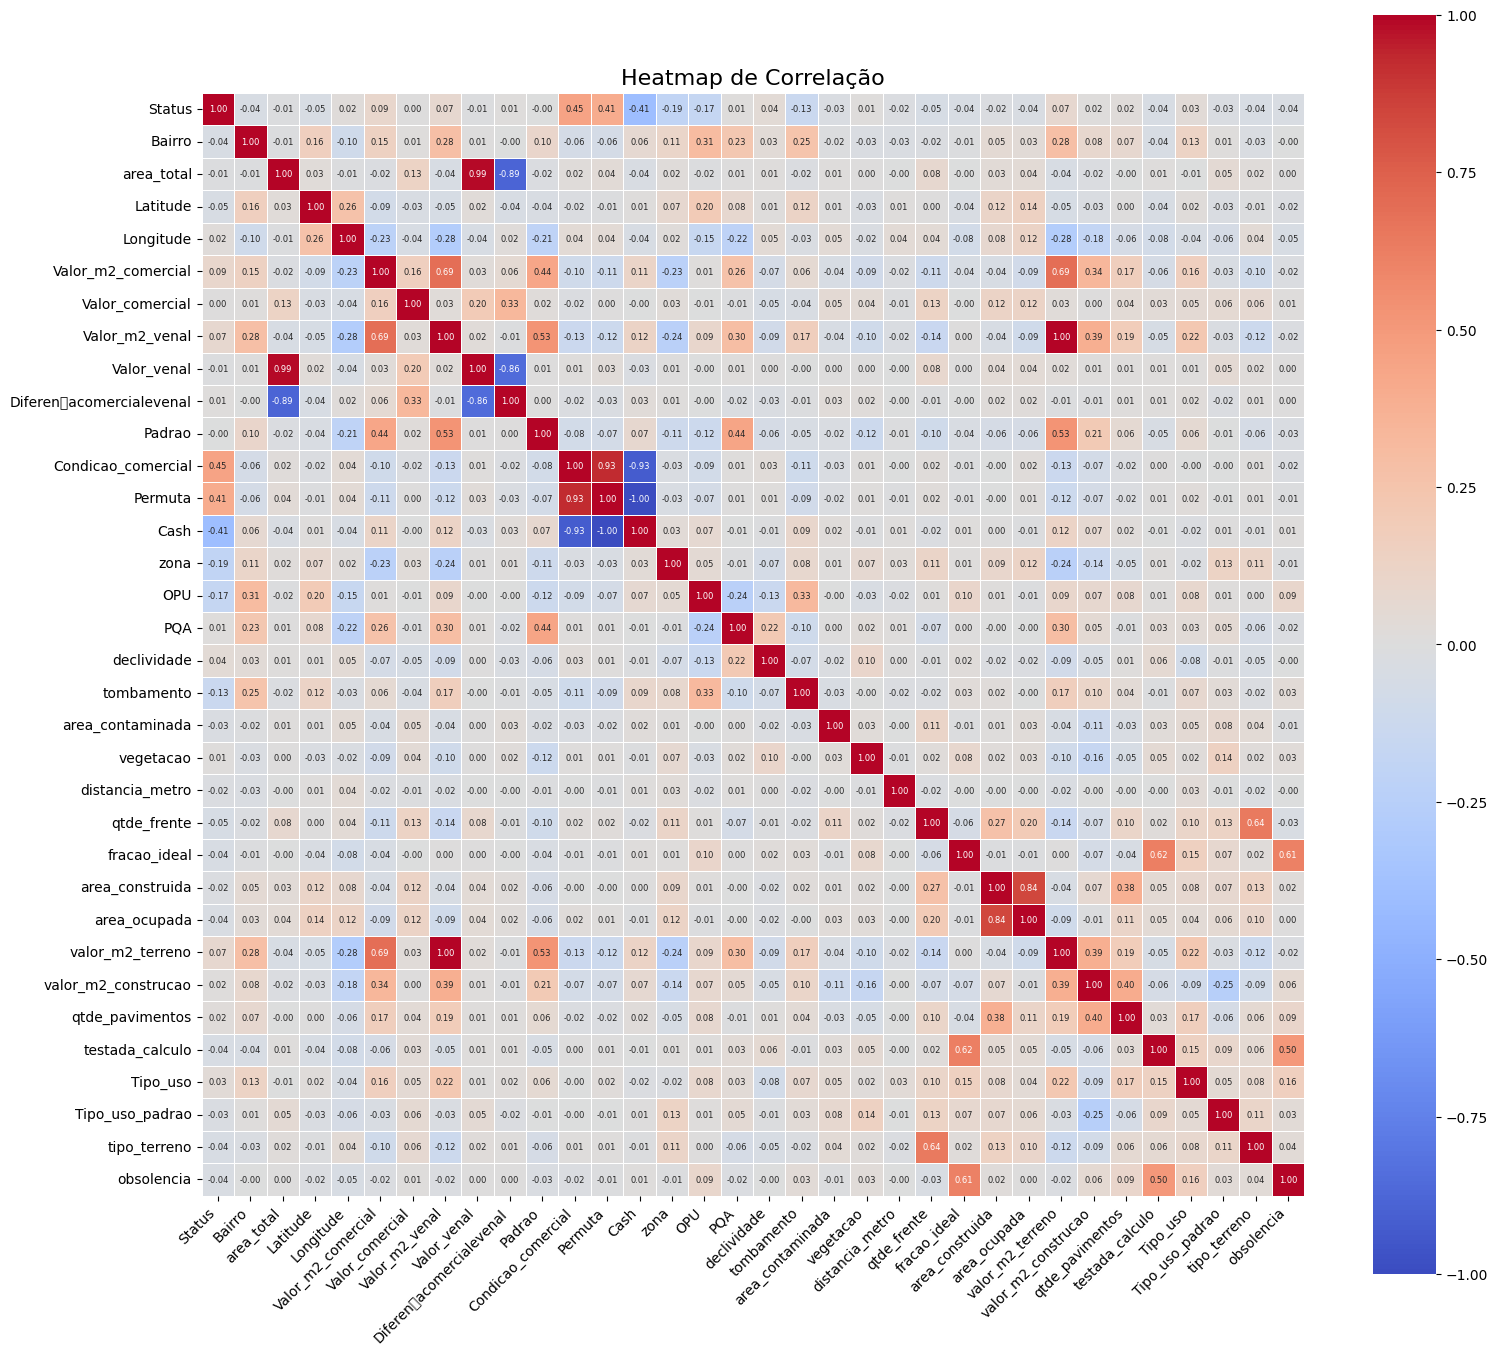

In [ ]:
# Configurações para o gráfico
plt.figure(figsize=(16, 14))  # Tamanho do gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            linewidths=.5, fmt='.2f', annot_kws={"size": 6}, square=True)

# Personalizações estéticas
plt.title('Heatmap de Correlação', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Ajusta automaticamente para que tudo caiba no gráfico

# Exibir o gráfico
plt.show()

## **Não-linear**

### **Correlação de Spearman**

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.draw()
<ipython-input-25-d12dbacd8b09>:11: UserWarning: Glyph 135 (\x87) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


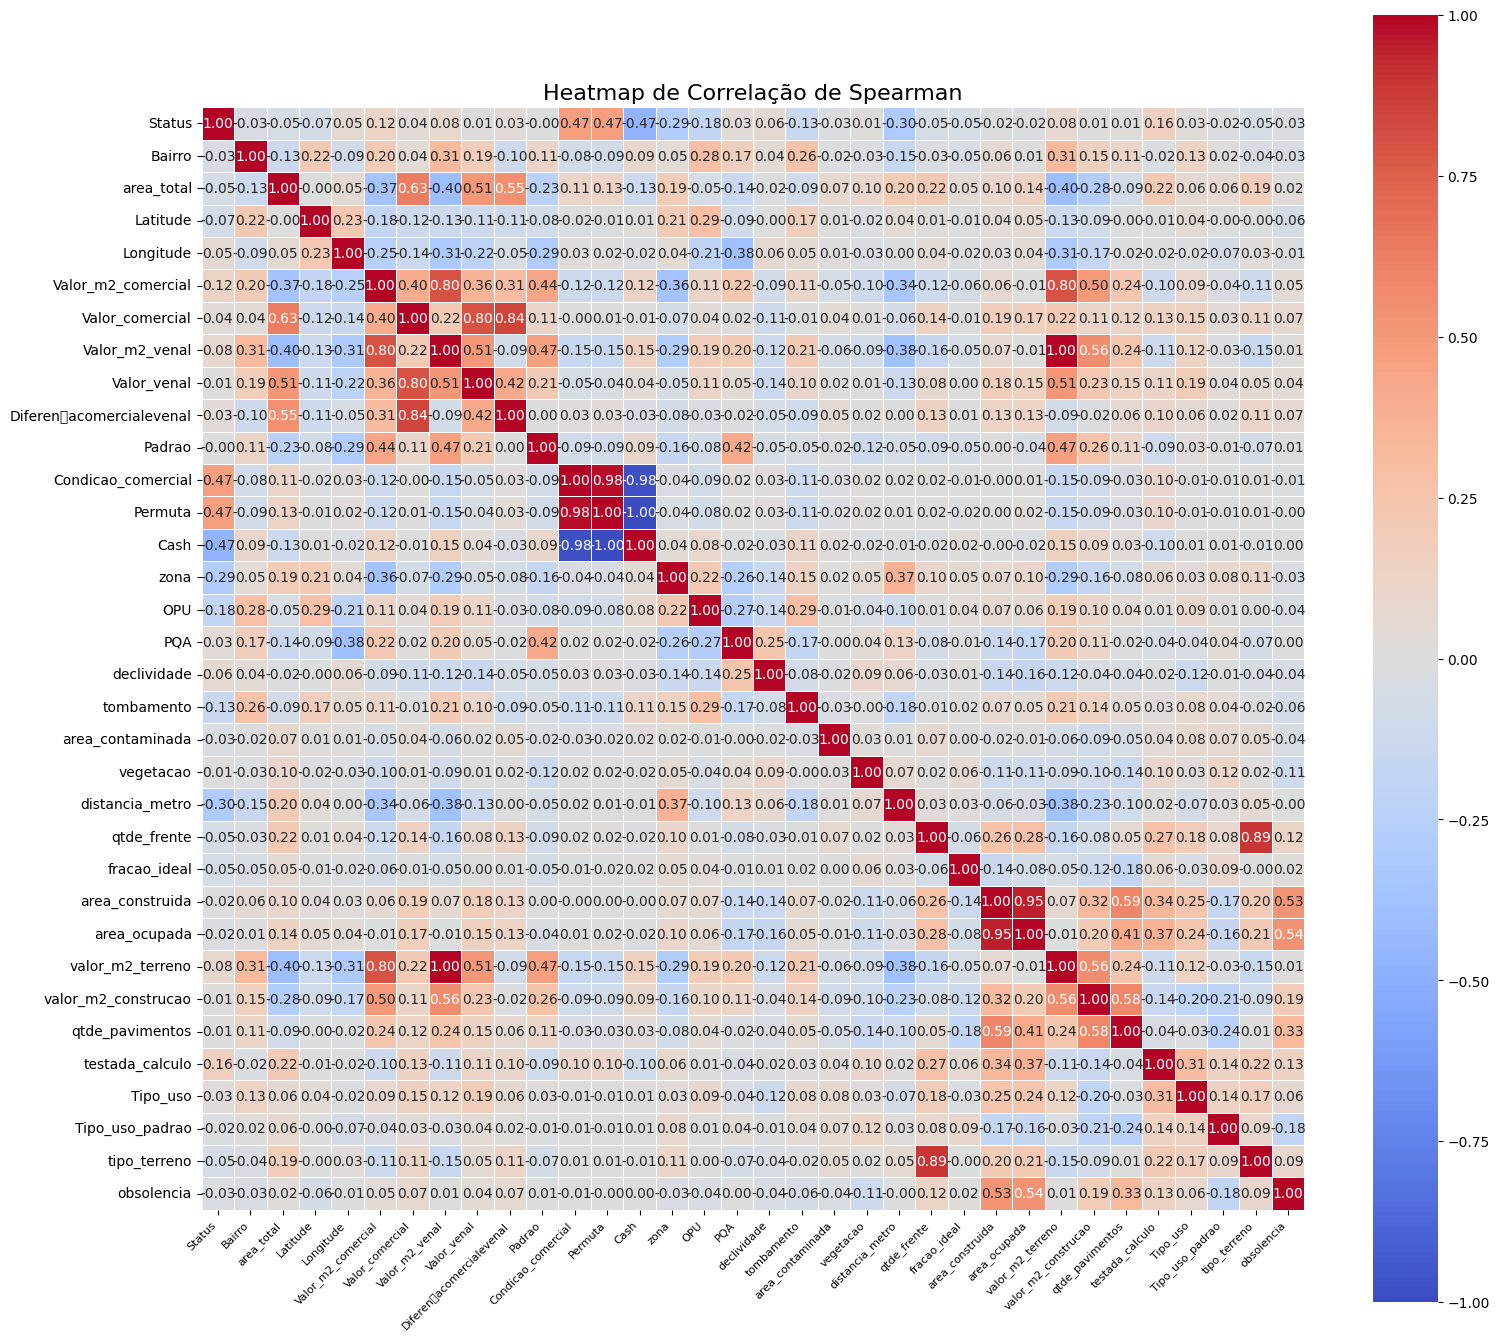

In [ ]:
# Correlação de Spearman
correlation_spearman = novo_raw_data_tratado.corr(method='spearman')

# Exibindo o heatmap da matriz de correlação de Spearman
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            linewidths=.5, fmt='.2f', annot_kws={"size": 10}, square=True)
plt.title('Heatmap de Correlação de Spearman', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### **Correlação de Kendall**

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


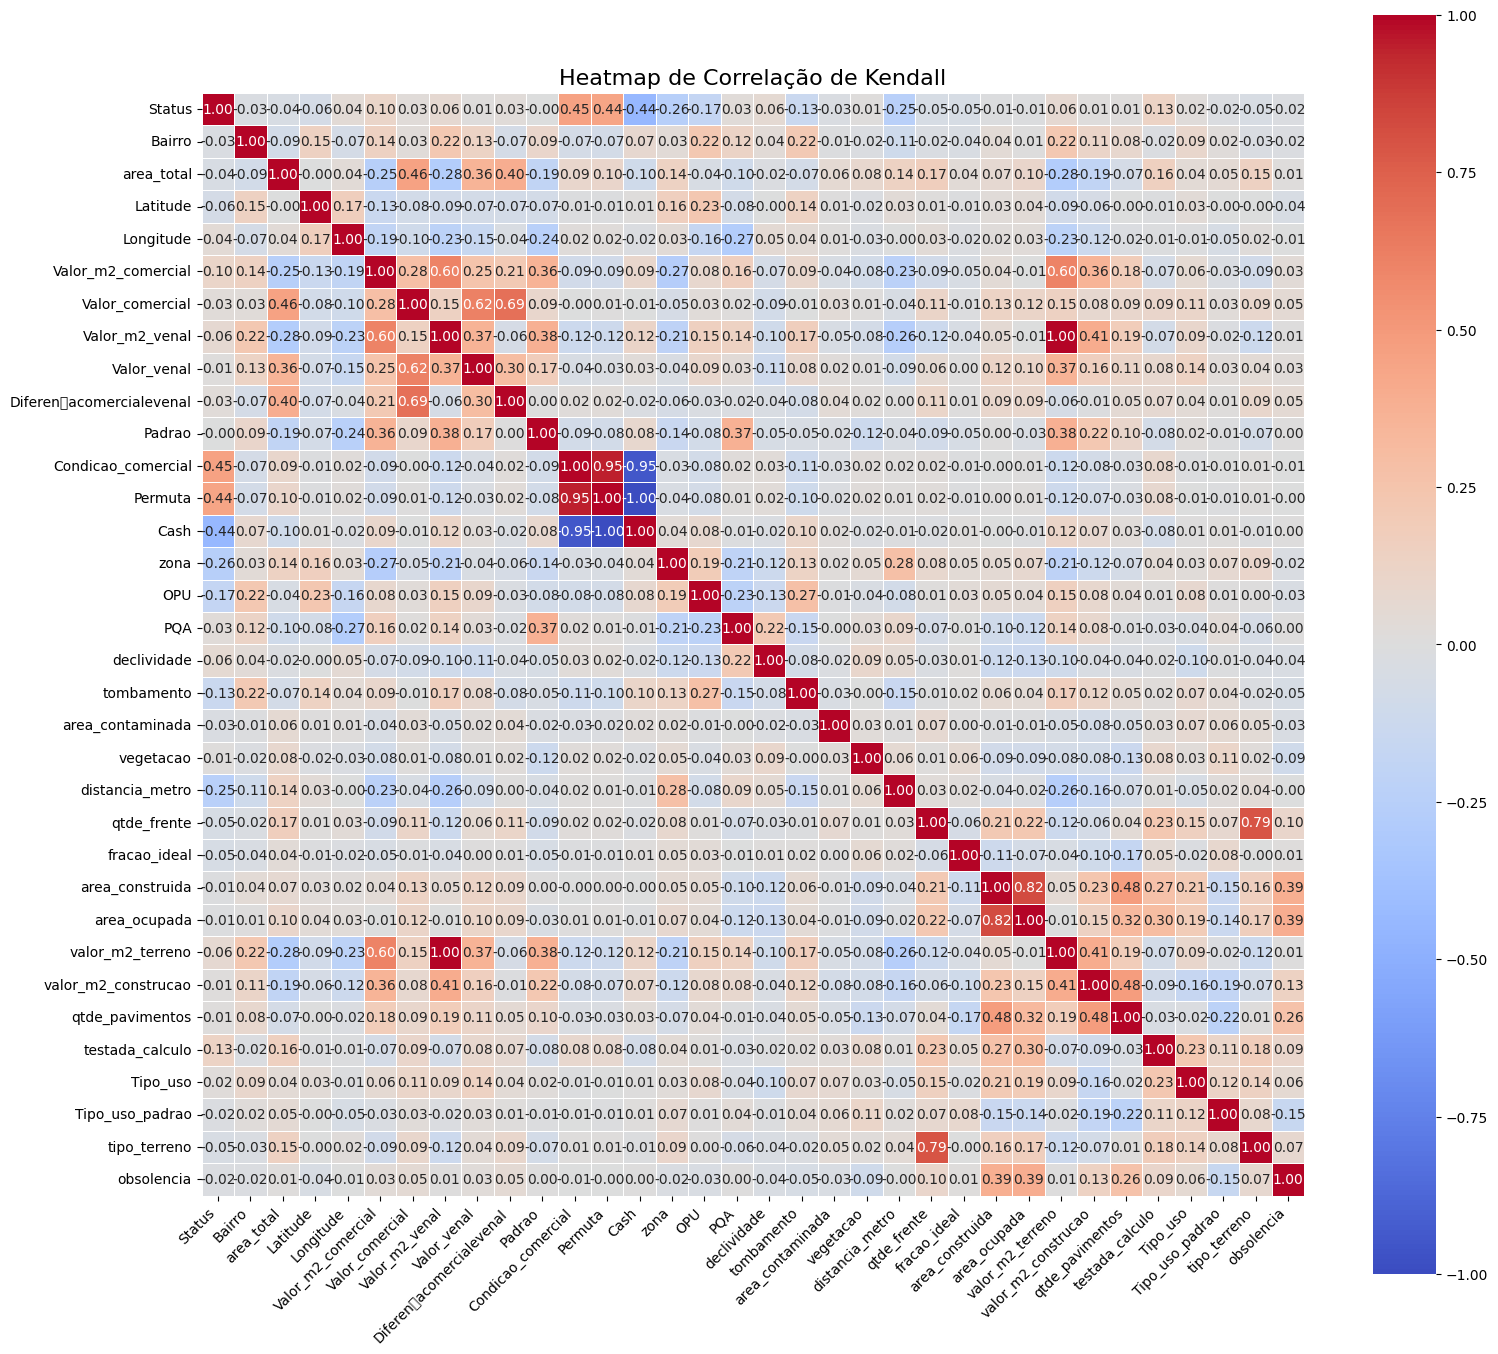

In [ ]:
# Correlação de Kendall
correlation_kendall = novo_raw_data_tratado.corr(method='kendall')

# Exibindo o heatmap da matriz de correlação de Kendall
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_kendall, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            linewidths=.5, fmt='.2f', annot_kws={"size": 10}, square=True)
plt.title('Heatmap de Correlação de Kendall', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# **Funções auxiliares**

In [ ]:
# Dicionário global para acumular os resultados de cada modelo
model_results = {}

# Função para plotar a curva ROC e a Matriz de Confusão na mesma linha
def plot_roc_and_confusion(y_test, y_pred, y_pred_proba, model_name):
    # Configuração da figura com 1 linha e 2 colunas
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    axes[0].plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    axes[0].legend(loc='lower right')
    axes[0].grid(True)

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes[1], colorbar=False)
    axes[1].set_title(f'Matriz de Confusão - {model_name}')

    plt.tight_layout()
    plt.show()

    # Salvar os resultados no dicionário global
    model_results[model_name] = model_results.get(model_name, {})
    model_results[model_name]['roc_auc'] = roc_auc
    model_results[model_name]['confusion_matrix'] = cm

# Função para mostrar o relatório de classificação em formato de DataFrame
def display_classification_report(y_test, y_pred, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Linha de separação entre gráficos e DataFrame
    print("\n" + "-" * 80 + "\n")

    # Exibir o DataFrame com o relatório de classificação
    display(report_df)

    # Salvar os resultados no dicionário global
    model_results[model_name] = model_results.get(model_name, {})
    model_results[model_name]['classification_report'] = report_df

def plot_feature_importance(model, feature_names, top_n=None):
    """
    Plota a importância das features de um modelo treinado em percentual.

    Parâmetros:
    - model: modelo treinado que possui o atributo `feature_importances_`.
    - feature_names: lista com os nomes das features.
    - top_n: número opcional de top features a serem exibidas (exibe todas se None).
    """
    # Verifica se o modelo possui o atributo `feature_importances_`
    if hasattr(model, 'feature_importances_'):
        # Obter a importância das features do modelo
        feature_importances = model.feature_importances_
    else:
        raise ValueError("O modelo fornecido não possui o atributo `feature_importances_`.")

    # Calcular a importância em percentual
    feature_importances_percent = 100 * (feature_importances / feature_importances.sum())

    # Criar um DataFrame para organizar as importâncias com os nomes das features
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance (%)': feature_importances_percent
    })

    # Ordenar as features por importância em ordem decrescente
    feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

    # Se especificado, selecionar apenas as top N features
    if top_n is not None:
        feature_importance_df = feature_importance_df.head(top_n)

    # Plotar a importância das features em percentual
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df)

    # Aplicar cores manualmente usando a paleta
    colors = sns.color_palette('viridis', len(feature_importance_df))
    for i, bar in enumerate(barplot.patches):
        bar.set_color(colors[i])

        # Adicionar o valor percentual em cada barra
        bar_width = bar.get_width()
        plt.text(
            bar_width + 0.5,  # Posição do texto um pouco à frente da barra
            bar.get_y() + bar.get_height() / 2,  # Posição no meio da barra
            f'{bar_width:.1f}%',  # Texto com uma casa decimal
            va='center'  # Alinhamento vertical centralizado
        )

    # Adicionar linhas de grade suaves
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.title('Importância das Features em Percentual')
    plt.xlabel('Importância (%)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Função para exibir o comparativo final dos resultados
def display_comparative_results():
    for model_name, results in model_results.items():
        print(f"\nResultados para o modelo: {model_name}")
        print("-" * 80)
        # Exibir ROC AUC
        print(f"AUC-ROC: {results.get('roc_auc', 'Não disponível'):.2f}")

        # Exibir Matriz de Confusão
        print("\nMatriz de Confusão:")
        print(results.get('confusion_matrix', 'Não disponível'))

        # Exibir Relatório de Classificação
        print("\nRelatório de Classificação:")
        display(results.get('classification_report', 'Não disponível'))
        print("\n" + "-" * 80 + "\n")

In [ ]:
'''
# Função para plotar a curva ROC e a Matriz de Confusão na mesma linha
def plot_roc_and_confusion(y_test, y_pred, y_pred_proba):
    # Configuração da figura com 1 linha e 2 colunas
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    axes[0].plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[0].legend(loc='lower right')
    axes[0].grid(True)

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes[1], colorbar=False)
    axes[1].set_title('Matriz de Confusão')

    plt.tight_layout()
    plt.show()

# Função para mostrar o relatório de classificação em formato de DataFrame
def display_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Linha de separação entre gráficos e DataFrame
    print("\n" + "-" * 80 + "\n")

    # Exibir o DataFrame com o relatório de classificação
    display(report_df)


def plot_feature_importance(model, feature_names, top_n=None):
    """
    Plota a importância das features de um modelo treinado em percentual.

    Parâmetros:
    - model: modelo treinado que possui o atributo `feature_importances_`.
    - feature_names: lista com os nomes das features.
    - top_n: número opcional de top features a serem exibidas (exibe todas se None).
    """
    # Verifica se o modelo possui o atributo `feature_importances_`
    if hasattr(model, 'feature_importances_'):
        # Obter a importância das features do modelo
        feature_importances = model.feature_importances_
    else:
        raise ValueError("O modelo fornecido não possui o atributo `feature_importances_`.")

    # Calcular a importância em percentual
    feature_importances_percent = 100 * (feature_importances / feature_importances.sum())

    # Criar um DataFrame para organizar as importâncias com os nomes das features
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance (%)': feature_importances_percent
    })

    # Ordenar as features por importância em ordem decrescente
    feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

    # Se especificado, selecionar apenas as top N features
    if top_n is not None:
        feature_importance_df = feature_importance_df.head(top_n)

    # Plotar a importância das features em percentual
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df)

    # Aplicar cores manualmente usando a paleta
    colors = sns.color_palette('viridis', len(feature_importance_df))
    for i, bar in enumerate(barplot.patches):
        bar.set_color(colors[i])

        # Adicionar o valor percentual em cada barra
        bar_width = bar.get_width()
        plt.text(
            bar_width + 0.5,  # Posição do texto um pouco à frente da barra
            bar.get_y() + bar.get_height() / 2,  # Posição no meio da barra
            f'{bar_width:.1f}%',  # Texto com uma casa decimal
            va='center'  # Alinhamento vertical centralizado
        )

    # Adicionar linhas de grade suaves
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.title('Importância das Features em Percentual')
    plt.xlabel('Importância (%)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
'''

'\n# Função para plotar a curva ROC e a Matriz de Confusão na mesma linha\ndef plot_roc_and_confusion(y_test, y_pred, y_pred_proba):\n    # Configuração da figura com 1 linha e 2 colunas\n    fig, axes = plt.subplots(1, 2, figsize=(16, 6))\n\n    # Curva ROC\n    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)\n    roc_auc = auc(fpr, tpr)\n    axes[0].plot(fpr, tpr, color=\'blue\', lw=2, label=f\'ROC Curve (AUC = {roc_auc:.2f})\')\n    axes[0].plot([0, 1], [0, 1], color=\'grey\', lw=1, linestyle=\'--\')\n    axes[0].set_xlabel(\'False Positive Rate\')\n    axes[0].set_ylabel(\'True Positive Rate\')\n    axes[0].set_title(\'Receiver Operating Characteristic (ROC) Curve\')\n    axes[0].legend(loc=\'lower right\')\n    axes[0].grid(True)\n\n    # Matriz de Confusão\n    cm = confusion_matrix(y_test, y_pred)\n    disp = ConfusionMatrixDisplay(confusion_matrix=cm)\n    disp.plot(cmap=\'Blues\', ax=axes[1], colorbar=False)\n    axes[1].set_title(\'Matriz de Confusão\')\n\n    plt.tight_layout(

# **Preparação dos dados para treinamento dos modelos**

In [ ]:
!gdown 1Zu4xzq9cWPN9tpfwZ91O49zZbgaCEBUC

Downloading...
From: https://drive.google.com/uc?id=1Zu4xzq9cWPN9tpfwZ91O49zZbgaCEBUC
To: /content/cadastro_terrenos_updated_cleaned.csv
100% 484k/484k [00:00<00:00, 8.84MB/s]


In [ ]:
novo_raw_data_tratado = pd.read_csv('cadastro_terrenos_updated_cleaned.csv')

In [ ]:
# Separar as features e o alvo
X = novo_raw_data_tratado.drop(columns=['Status'])
y = novo_raw_data_tratado['Status']

In [ ]:
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [ ]:
# Contar a quantidade de elementos nos conjuntos de treino e teste
print(f'Quantidade de elementos em X_train: {len(X_train)}')
print(f'Quantidade de elementos em X_test: {len(X_test)}')
print(f'Quantidade de elementos em y_train: {len(y_train)}')
print(f'Quantidade de elementos em y_test: {len(y_test)}')

Quantidade de elementos em X_train: 1857
Quantidade de elementos em X_test: 796
Quantidade de elementos em y_train: 1857
Quantidade de elementos em y_test: 796


# **Algoritmos**

* **Estudando a base de dados inteira: todas features sendo consideradas nos treinamentos**

# LightGBM
* Padrão para teste em classes desbalanceadas

In [ ]:
# Treinando o Modelo LGBM
model_LGBM = LGBMClassifier(
    class_weight='balanced',
    random_state=RANDOM_STATE,
    verbosity=0)  # `class_weight='balanced'` lida com desbalanceamento

model_LGBM.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42, verbosity=0)

In [ ]:
# Avaliação do Modelo
y_pred = model_LGBM.predict(X_test)
y_pred_proba = model_LGBM.predict_proba(X_test)[:, 1]
threshold = 0.5  # Ajuste o threshold para algo mais moderado
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

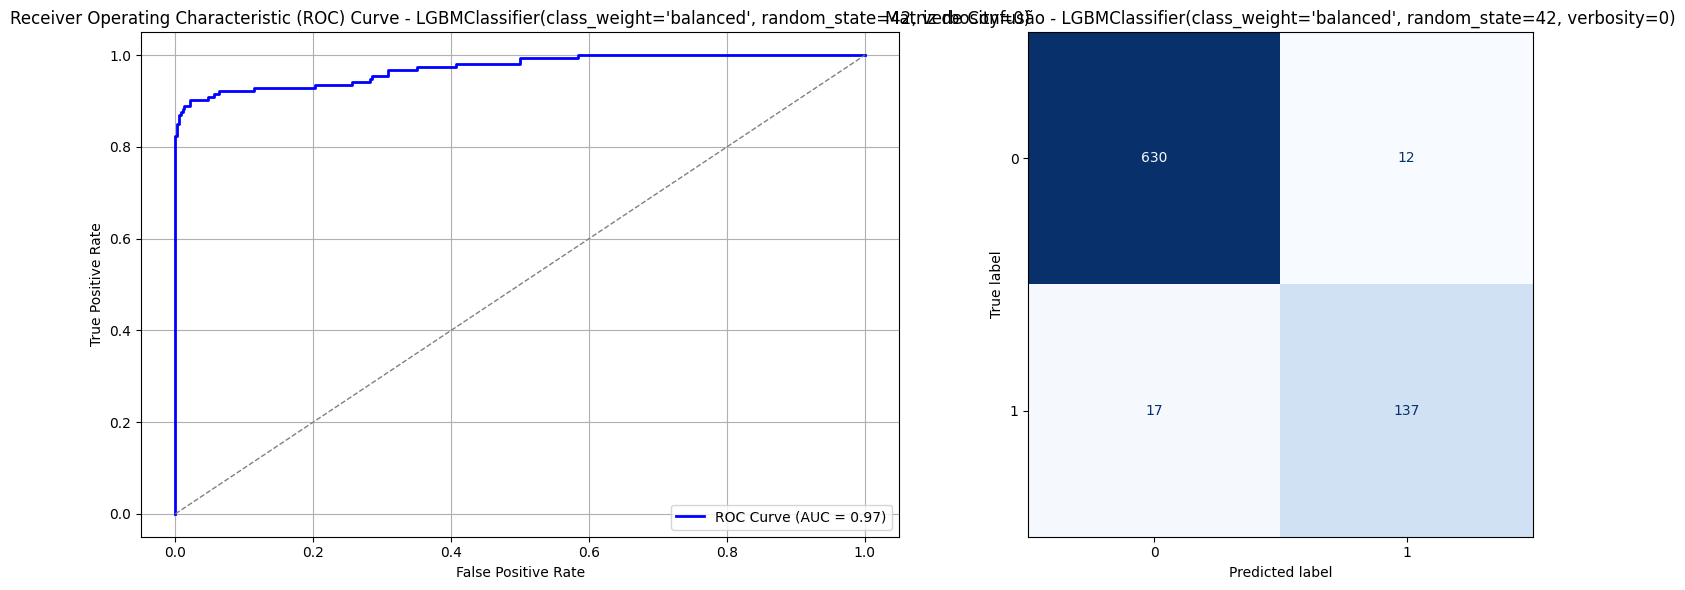


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.973725  0.981308  0.977502  642.000000
1              0.919463  0.889610  0.904290  154.000000
accuracy       0.963568  0.963568  0.963568    0.963568
macro avg      0.946594  0.935459  0.940896  796.000000
weighted avg   0.963227  0.963568  0.963338  796.000000

In [ ]:
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_pred, y_pred_proba, model_LGBM)
display_classification_report(y_test, y_pred, model_LGBM)

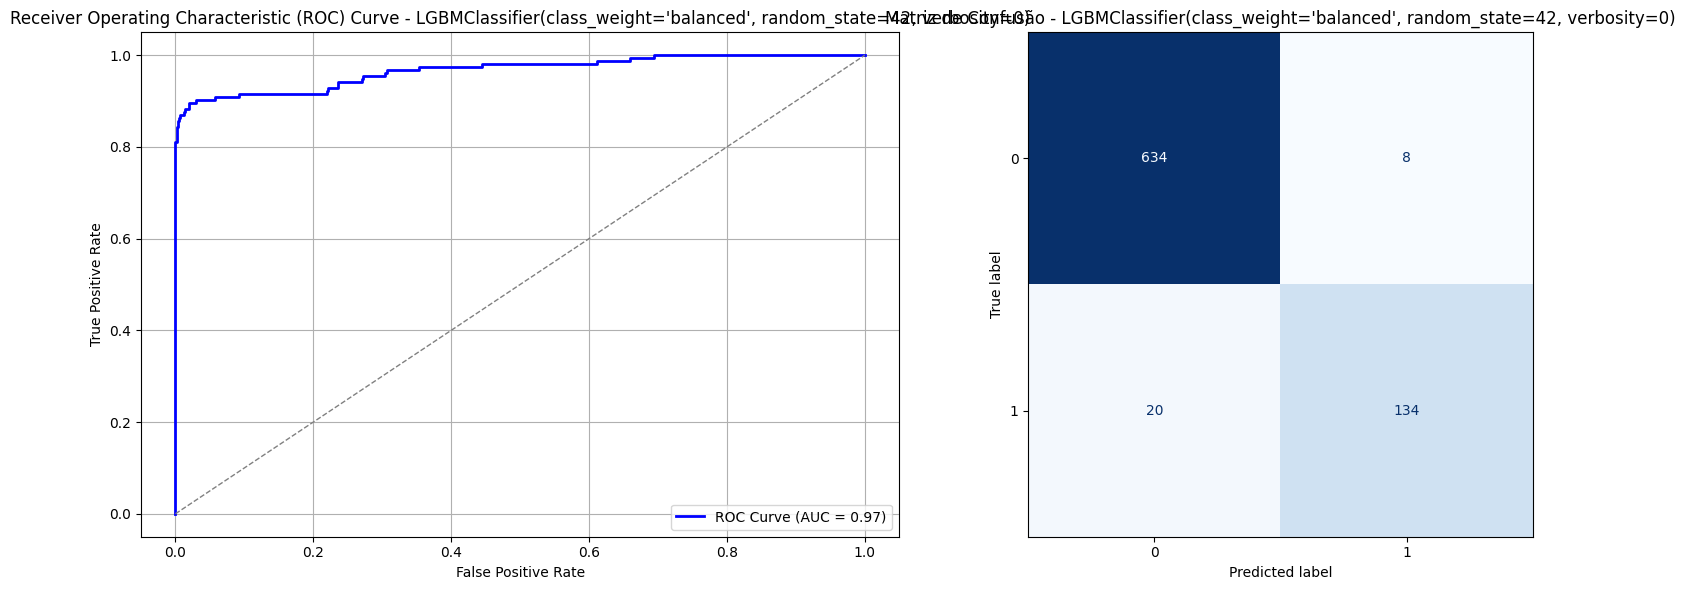


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.969419  0.987539  0.978395  642.000000
1              0.943662  0.870130  0.905405  154.000000
accuracy       0.964824  0.964824  0.964824    0.964824
macro avg      0.956540  0.928834  0.941900  796.000000
weighted avg   0.964436  0.964824  0.964274  796.000000

In [ ]:
# @title LightGBM + Smote
# Import the SMOTE class from the imblearn.over_sampling module
from imblearn.over_sampling import SMOTE

# Now you can use the SMOTE class
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model_LGBM_Smote = LGBMClassifier(
    class_weight='balanced',
    random_state=RANDOM_STATE,
    verbosity=0)

model_LGBM_Smote.fit(X_train_resampled, y_train_resampled)

# Avaliação do Modelo
y_LGBM_Smote_pred = model_LGBM_Smote.predict(X_test)
y_LGBM_Smote_pred_proba = model_LGBM_Smote.predict_proba(X_test)[:, 1]
threshold = 0.5  # Ajuste o threshold para algo mais moderado
y_LGBM_Smote_pred_adjusted = (y_LGBM_Smote_pred_proba >= threshold).astype(int)

# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_LGBM_Smote_pred, y_LGBM_Smote_pred_proba, model_LGBM_Smote)
display_classification_report(y_test, y_LGBM_Smote_pred, model_LGBM_Smote)

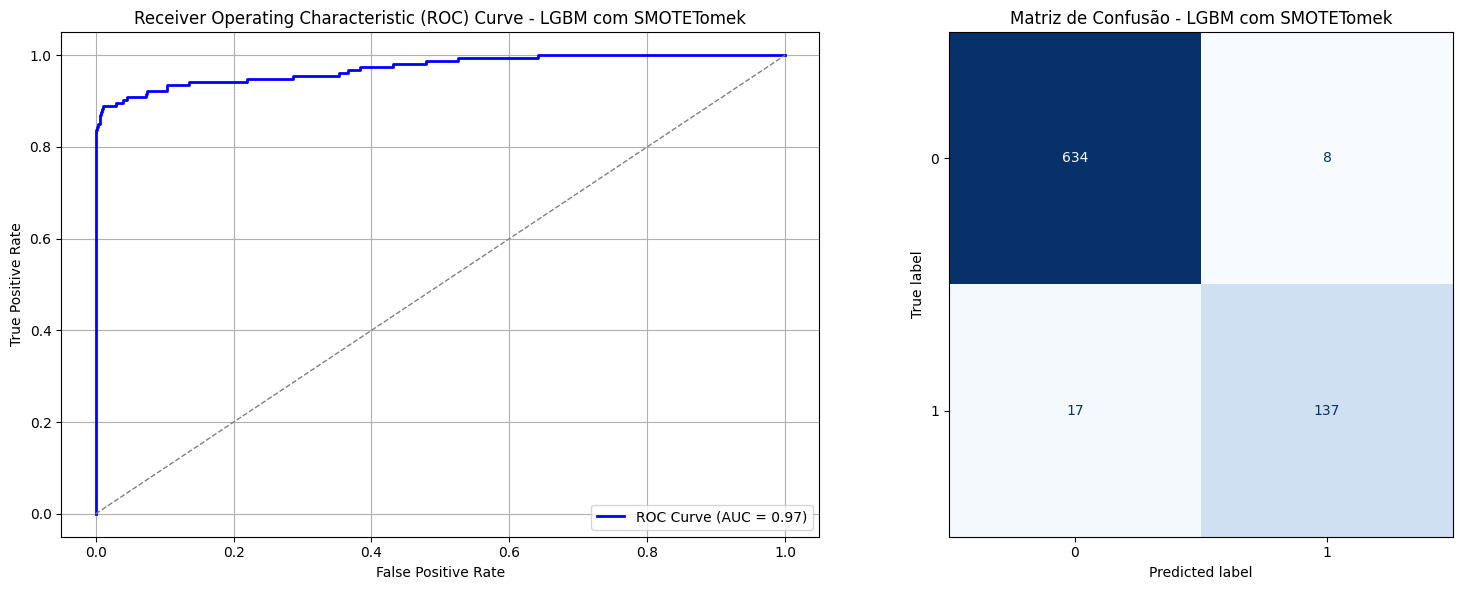


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.973886  0.987539  0.980665  642.000000
1              0.944828  0.889610  0.916388  154.000000
accuracy       0.968593  0.968593  0.968593    0.968593
macro avg      0.959357  0.938575  0.948527  796.000000
weighted avg   0.968264  0.968593  0.968230  796.000000

In [ ]:
# @title LightGBM + Smotetomek
# prompt: LGBM com smotetomek

# Aplicando SMOTETomek
smote_tomek = SMOTETomek(random_state=RANDOM_STATE)
X_train_smotetomek_resampled, y_train_smotetomek_resampled = smote_tomek.fit_resample(X_train, y_train)

# Treinando o modelo LGBM com os dados balanceados
model_LGBM_SmoteTomek = LGBMClassifier(
    class_weight='balanced',
    random_state=RANDOM_STATE,
    verbosity=0
)
model_LGBM_SmoteTomek.fit(X_train_smotetomek_resampled, y_train_smotetomek_resampled)

# Avaliação do Modelo
y_LGBM_SmoteTomek_pred = model_LGBM_SmoteTomek.predict(X_test)
y_LGBM_SmoteTomek_pred_proba = model_LGBM_SmoteTomek.predict_proba(X_test)[:, 1]

# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_LGBM_SmoteTomek_pred, y_LGBM_SmoteTomek_pred_proba, "LGBM com SMOTETomek")
display_classification_report(y_test, y_LGBM_SmoteTomek_pred, "LGBM com SMOTETomek")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

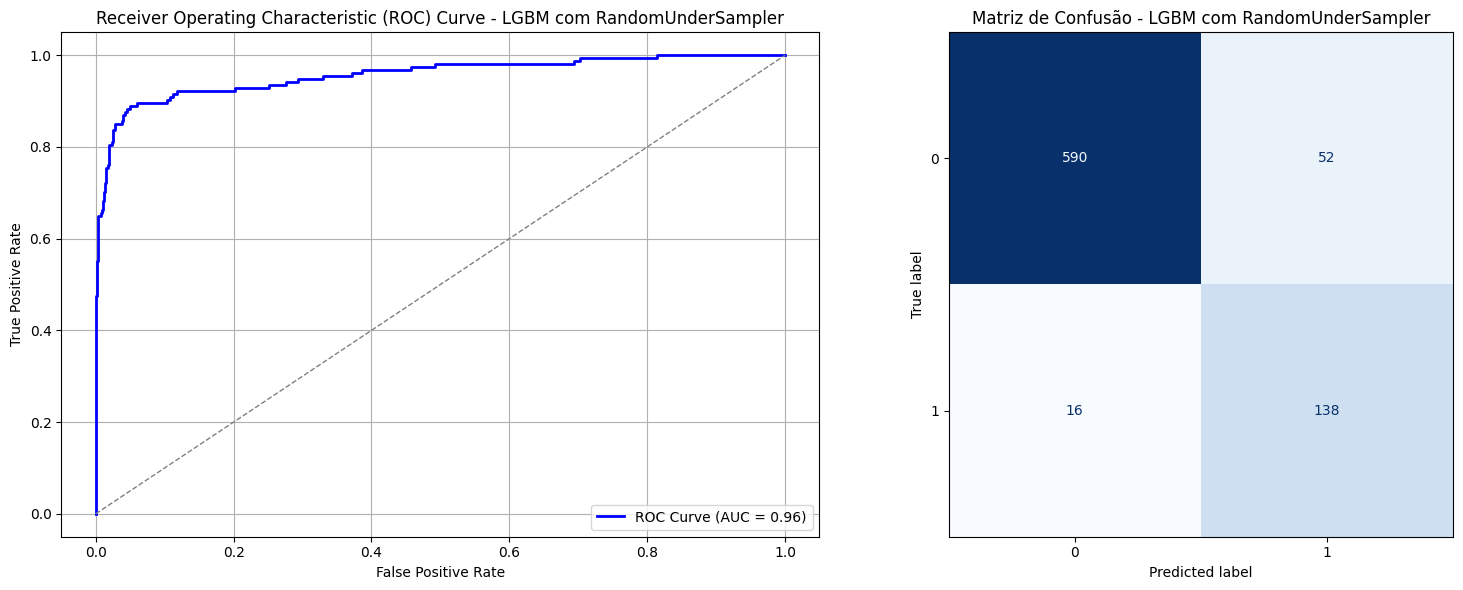


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.973597  0.919003  0.945513  642.000000
1              0.726316  0.896104  0.802326  154.000000
accuracy       0.914573  0.914573  0.914573    0.914573
macro avg      0.849957  0.907554  0.873919  796.000000
weighted avg   0.925756  0.914573  0.917811  796.000000

In [ ]:
# @title LightGBM + Random Under Sampler
# prompt: LGBM + Random Under Sampler

# Aplicando RandomUnderSampler
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_train_rus_resampled, y_train_rus_resampled = rus.fit_resample(X_train, y_train)

# Treinando o modelo LGBM com os dados balanceados
model_LGBM_rus = LGBMClassifier(
    class_weight='balanced',
    random_state=RANDOM_STATE,
    verbosity=0
)
model_LGBM_rus.fit(X_train_rus_resampled, y_train_rus_resampled)

# Avaliação do Modelo
y_LGBM_rus_pred = model_LGBM_rus.predict(X_test)
y_LGBM_rus_pred_proba = model_LGBM_rus.predict_proba(X_test)[:, 1]

# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_LGBM_rus_pred, y_LGBM_rus_pred_proba, "LGBM com RandomUnderSampler")
display_classification_report(y_test, y_LGBM_rus_pred, "LGBM com RandomUnderSampler")


# Comparação LightGBM

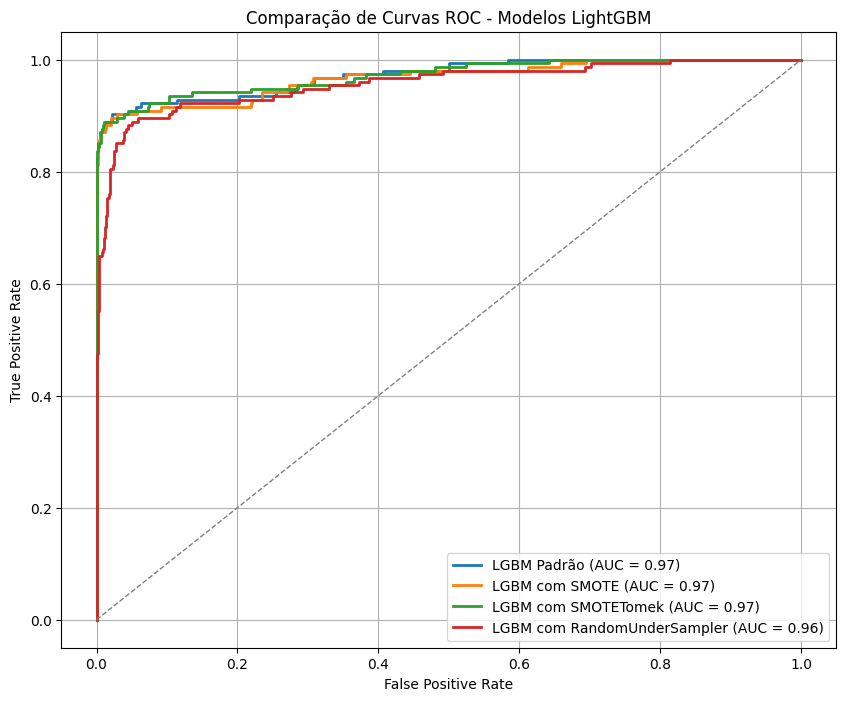

<ipython-input-41-1f99ad5969c2>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame([{


Modelo  Precisão  Recall  F1-Score  Acurácia
0                  LGBM Padrão     0.963   0.964     0.963     0.964
1               LGBM com SMOTE     0.964   0.965     0.964     0.965
2          LGBM com SMOTETomek     0.968   0.969     0.968     0.969
3  LGBM com RandomUnderSampler     0.926   0.915     0.918     0.915

In [ ]:
# @title Métricas
# prompt: Comparar os modelos  LightGBM com gráficos e tabelas das métricas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay

# ... (código anterior para treinamento dos modelos LGBM)

# Lista de modelos e suas respectivas previsões
models = [
    ("LGBM Padrão", model_LGBM, y_pred, y_pred_proba),
    ("LGBM com SMOTE", model_LGBM_Smote, y_LGBM_Smote_pred, y_LGBM_Smote_pred_proba),
    ("LGBM com SMOTETomek", model_LGBM_SmoteTomek, y_LGBM_SmoteTomek_pred, y_LGBM_SmoteTomek_pred_proba),
    ("LGBM com RandomUnderSampler", model_LGBM_rus, y_LGBM_rus_pred, y_LGBM_rus_pred_proba)
]

# Plotando as curvas ROC
plt.figure(figsize=(10, 8))
for name, model, y_pred_temp, y_pred_proba_temp in models:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_temp)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparação de Curvas ROC - Modelos LightGBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Criando um DataFrame para comparar as métricas de classificação
metrics_df = pd.DataFrame(columns=['Modelo', 'Precisão', 'Recall', 'F1-Score'])

for name, model, y_pred_temp, _ in models:
    report = classification_report(y_test, y_pred_temp, output_dict=True)
    metrics_df = pd.concat([metrics_df, pd.DataFrame([{
    'Modelo': name,
    'Acurácia': report['accuracy'],
    'Precisão': report['weighted avg']['precision'],
    'Recall': report['weighted avg']['recall'],
    'F1-Score': report['weighted avg']['f1-score']
}])], ignore_index=True)

# Exibindo o DataFrame com as métricas
display(metrics_df.round(3))


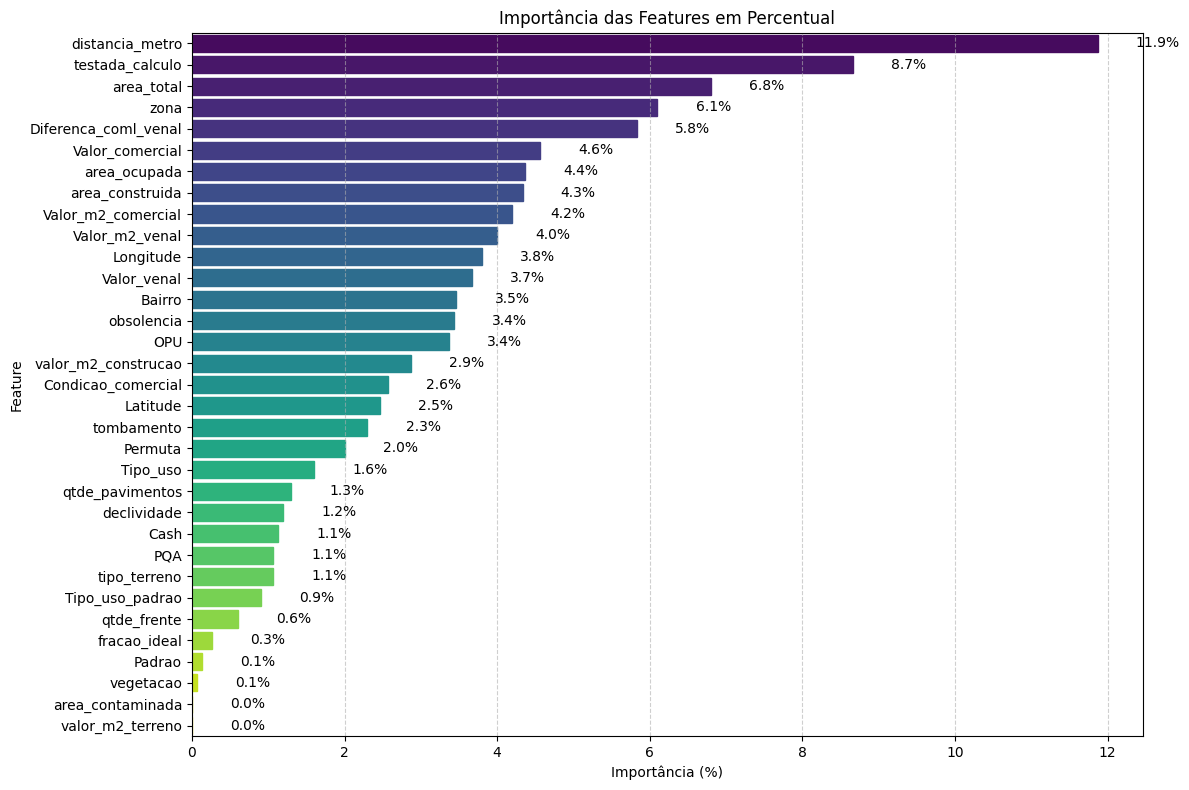

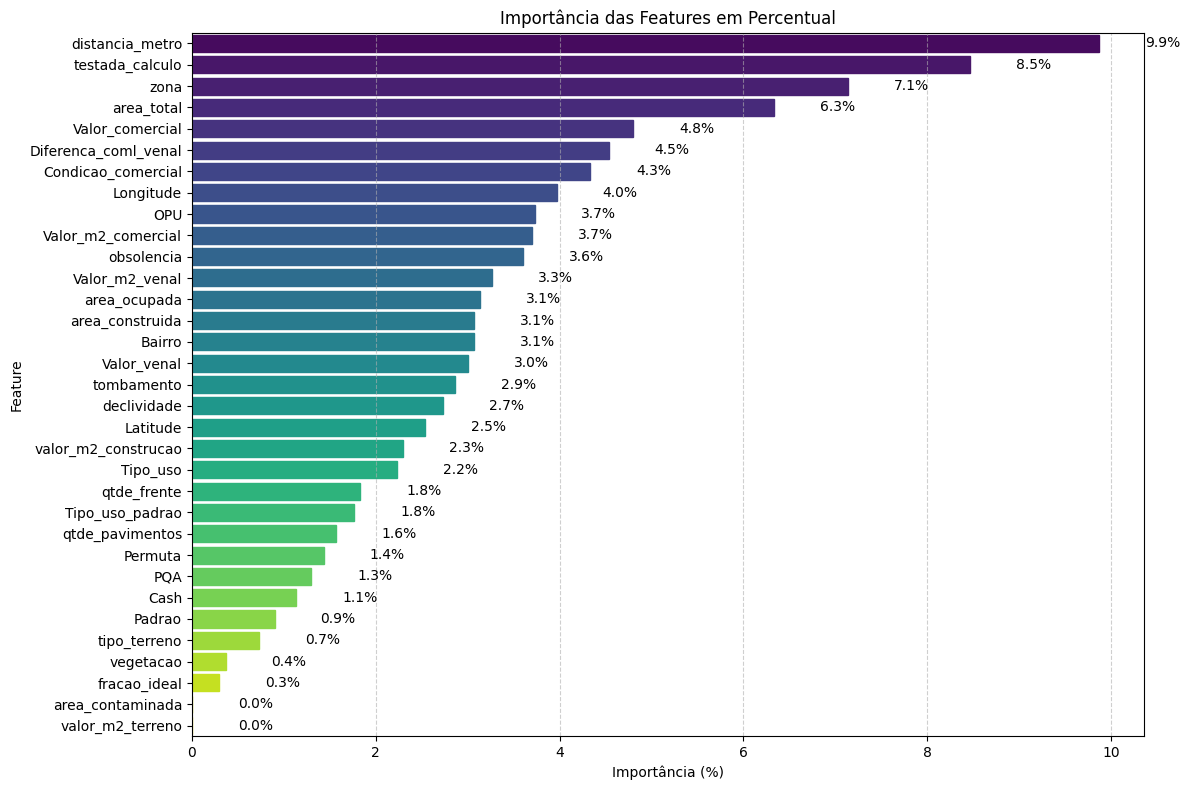

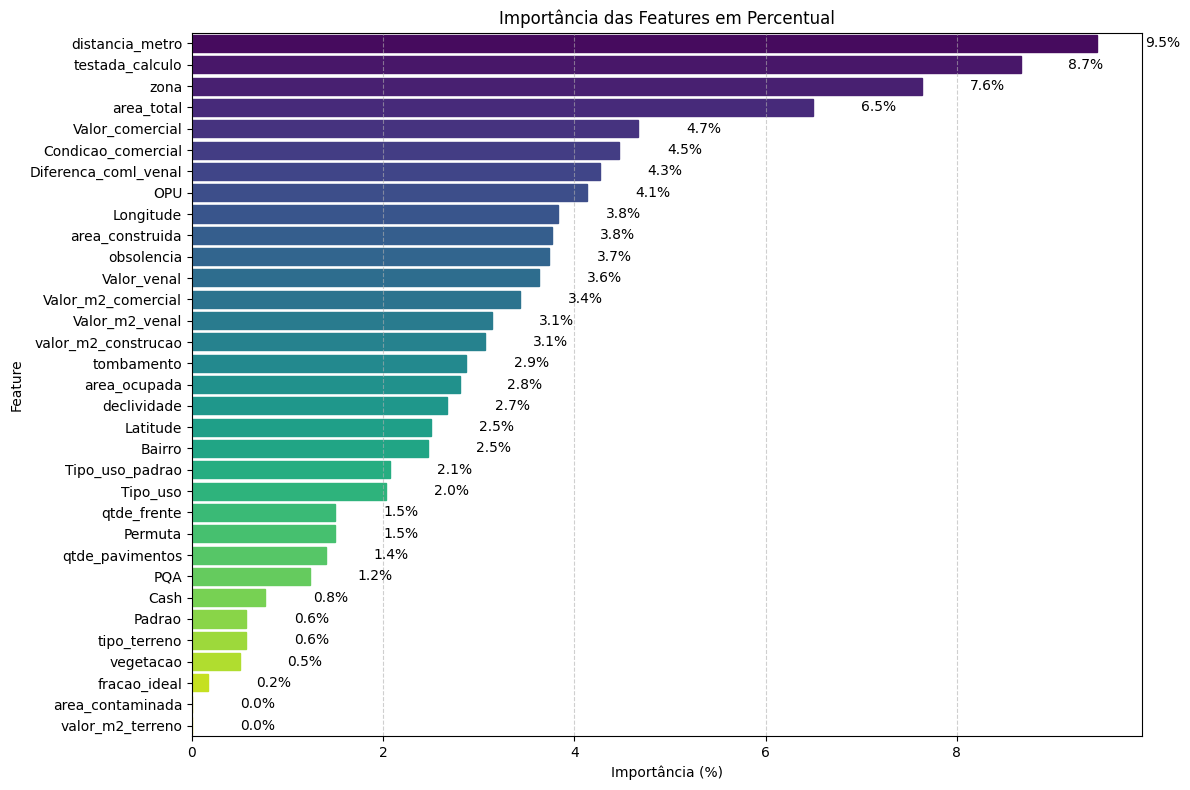

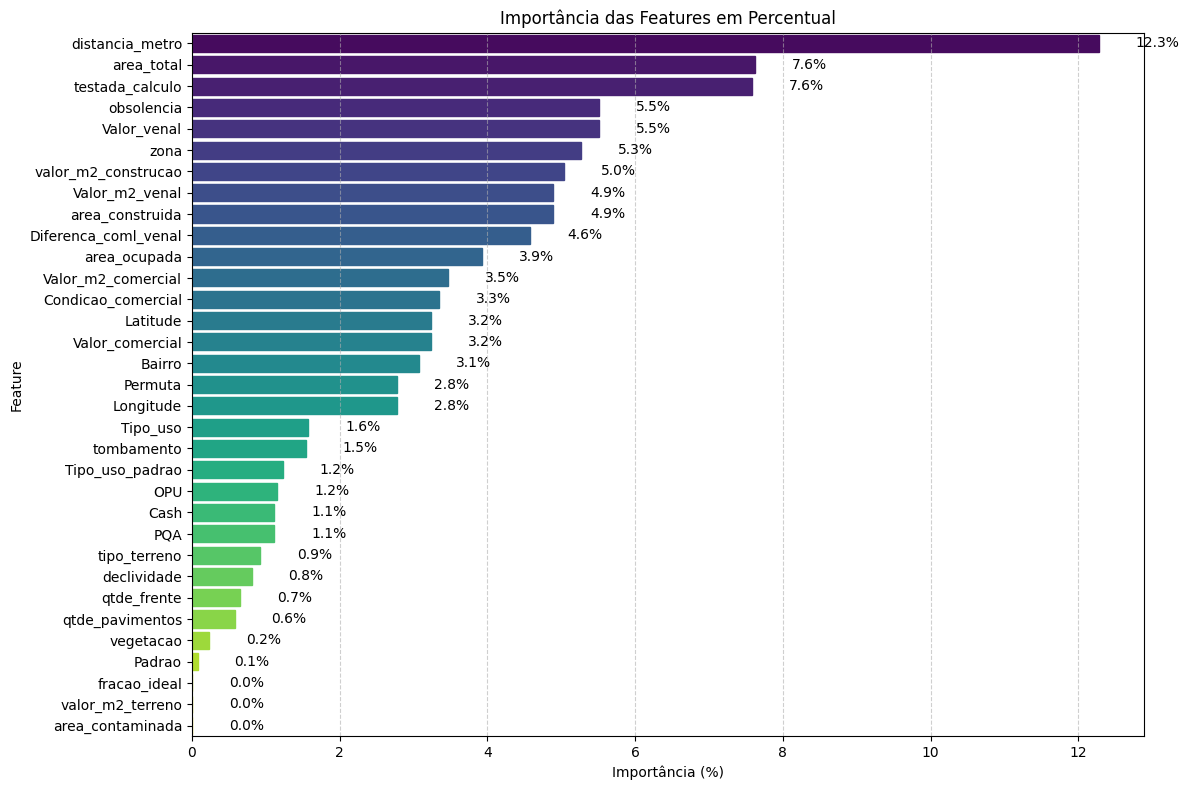

In [ ]:
# prompt: comparar as variáveis em gráfico de barra de cada modelo, plot_feature_importance(model, X_train.columns)

plot_feature_importance(model_LGBM, X_train.columns)
plot_feature_importance(model_LGBM_Smote, X_train.columns)
plot_feature_importance(model_LGBM_SmoteTomek, X_train.columns)
plot_feature_importance(model_LGBM_rus, X_train.columns)


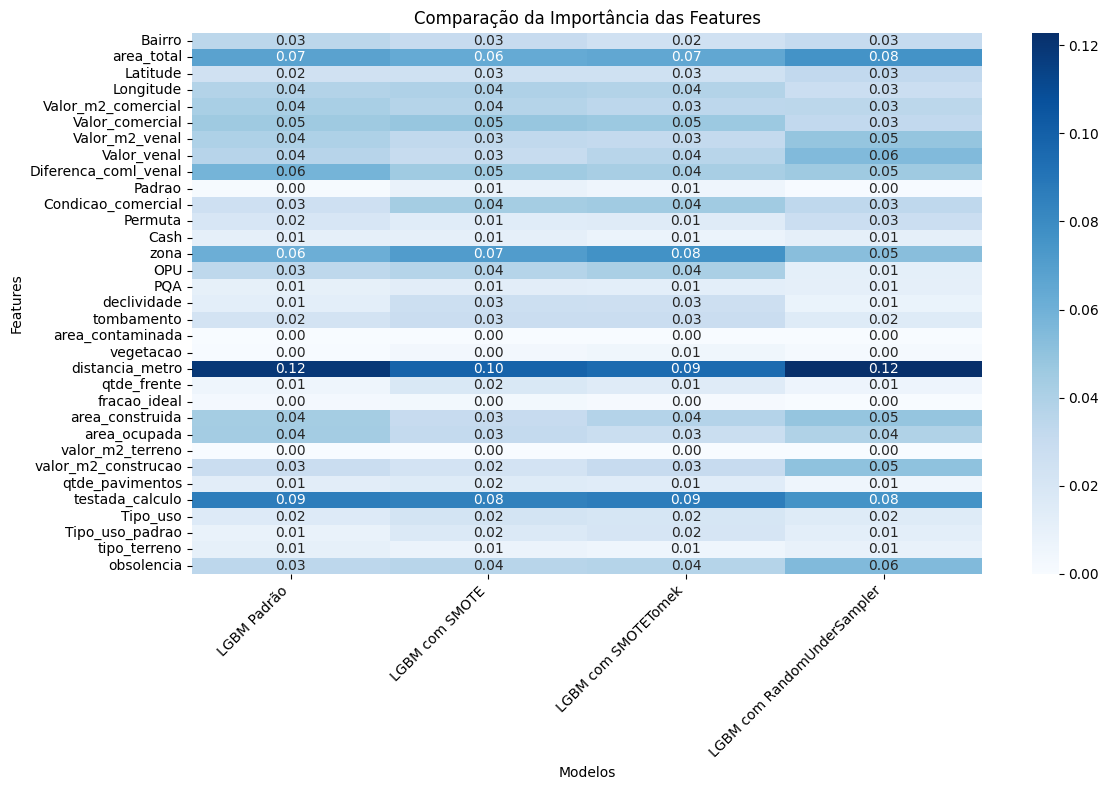

In [ ]:
# @title Variáveis
# prompt: Comparar Features dos modelos em um visual de calor

import pandas as pd
import matplotlib.pyplot as plt
# Lista de modelos e seus nomes
models = [
    ("LGBM Padrão", model_LGBM),
    ("LGBM com SMOTE", model_LGBM_Smote),
    ("LGBM com SMOTETomek", model_LGBM_SmoteTomek),
    ("LGBM com RandomUnderSampler", model_LGBM_rus)
]

# Criando um DataFrame para armazenar as importâncias das features
feature_importances_df = pd.DataFrame()

# Extraindo as importâncias das features de cada modelo
for name, model in models:
    feature_importances = model.feature_importances_
    feature_importances_df[name] = feature_importances

# Definindo os nomes das features (substitua pelos nomes corretos)
feature_names = X_train.columns
feature_importances_df.index = feature_names

# Normalizando as importâncias das features para cada modelo (0 a 1)
feature_importances_df = feature_importances_df.apply(lambda x: x / x.sum(), axis=0)

# Plotando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importances_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Comparação da Importância das Features')
plt.xlabel('Modelos')
plt.ylabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


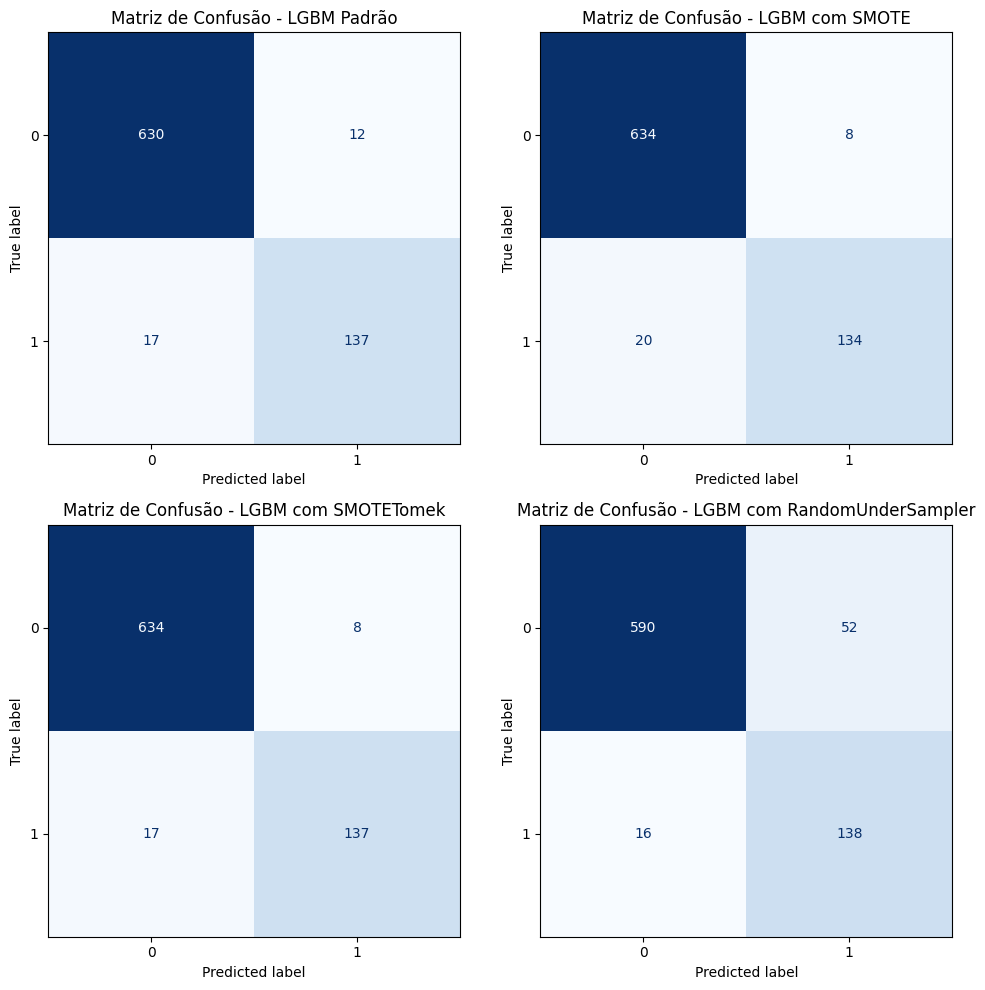

In [ ]:
# @title Matriz de confusão

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Lista de modelos e suas respectivas previsões
models = [
    ("LGBM Padrão", model_LGBM, y_pred),
    ("LGBM com SMOTE", model_LGBM_Smote, y_LGBM_Smote_pred),
    ("LGBM com SMOTETomek", model_LGBM_SmoteTomek, y_LGBM_SmoteTomek_pred),
    ("LGBM com RandomUnderSampler", model_LGBM_rus, y_LGBM_rus_pred)
]

# Plotando as matrizes de confusão
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Mantém o tamanho da figura como 8x8

# Loop pelos modelos
for i, (name, model, y_pred_temp) in enumerate(models):
    row = i // 2
    col = i % 2
    cm = confusion_matrix(y_test, y_pred_temp)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes[row, col], colorbar=False)
    axes[row, col].set_title(f'Matriz de Confusão - {name}')

# Ajusta o espaçamento entre as colunas (wspace) e as linhas (hspace)
plt.subplots_adjust(wspace= 2, hspace= 2)  # Aumenta o espaço horizontal e vertical

plt.tight_layout()
plt.show()

In [ ]:
# @title Métricas matriz de confusão
# prompt: Montar uma tabela com as métricas da matriz em porcentagem

import pandas as pd
import numpy as np
# Lista de modelos e suas respectivas previsões
models = [
    ("LGBM Padrão", model_LGBM, y_pred),
    ("LGBM com SMOTE", model_LGBM_Smote, y_LGBM_Smote_pred),
    ("LGBM com SMOTETomek", model_LGBM_SmoteTomek, y_LGBM_SmoteTomek_pred),
    ("LGBM com RandomUnderSampler", model_LGBM_rus, y_LGBM_rus_pred)
]

# Criando um DataFrame para armazenar as métricas
metrics_df = pd.DataFrame(columns=['Modelo', 'Verdadeiro Positivo (%)', 'Falso Positivo (%)',
                                   'Verdadeiro Negativo (%)', 'Falso Negativo (%)'])

# Loop pelos modelos
for name, model, y_pred_temp in models:
    cm = confusion_matrix(y_test, y_pred_temp)
    total = np.sum(cm)
    metrics_df = pd.concat([metrics_df, pd.DataFrame([{
        'Modelo': name,
        'Verdadeiro Positivo (%)': (cm[1, 1] / total) * 100,
        'Falso Positivo (%)': (cm[0, 1] / total) * 100,
        'Verdadeiro Negativo (%)': (cm[0, 0] / total) * 100,
        'Falso Negativo (%)': (cm[1, 0] / total) * 100
    }])], ignore_index=True)

# Exibindo o DataFrame com as métricas em porcentagem
display(metrics_df.round(2))


<ipython-input-50-6836ef01acd8>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame([{


Modelo  Verdadeiro Positivo (%)  Falso Positivo (%)  \
0                  LGBM Padrão                    17.21                1.51   
1               LGBM com SMOTE                    16.83                1.01   
2          LGBM com SMOTETomek                    17.21                1.01   
3  LGBM com RandomUnderSampler                    17.34                6.53   

   Verdadeiro Negativo (%)  Falso Negativo (%)  
0                    79.15                2.14  
1                    79.65                2.51  
2                    79.65                2.14  
3                    74.12                2.01

# XG Boost

In [ ]:
model_XGB = XGBClassifier(
    class_weight='balanced',
    random_state=RANDOM_STATE,
    verbosity=0,learning_rate = 0.01 , max_depth = 6, n_estimators = 100)  # `class_weight='balanced'` lida com desbalanceamento
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validation = cross_val_score(model_XGB, X_train, y_train)

Cross_validation

array([0.94354839, 0.94623656, 0.95687332, 0.9703504 , 0.96495957])

In [ ]:
 Cross_validation.mean()

0.9563936469292524

In [ ]:
# Avaliação do Modelo
y_XGB_pred = model_XGB.predict(X_test)
y_XGB_pred_proba = model_XGB.predict_proba(X_test)[:, 1]
threshold = 0.5  # Ajuste o threshold para algo mais moderado
y_XGB_pred_adjusted = (y_XGB_pred_proba >= threshold).astype(int)

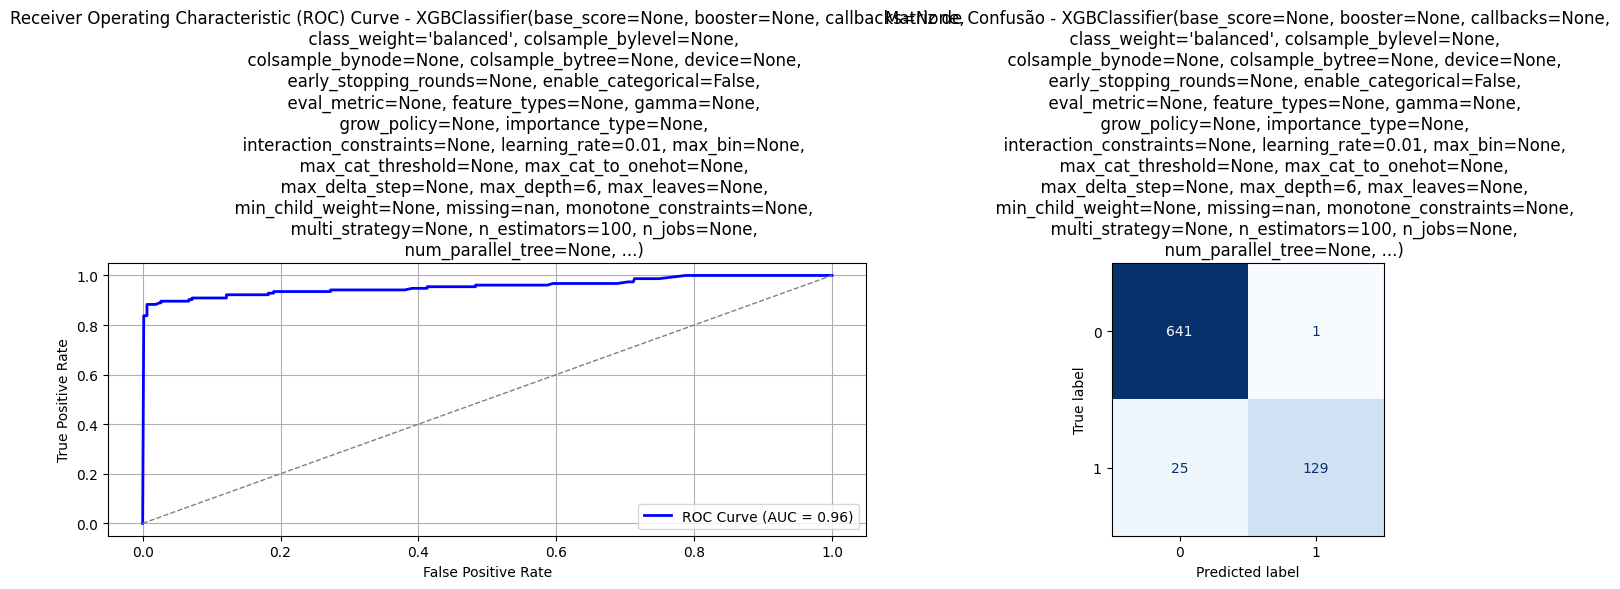


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.962462  0.998442  0.980122  642.000000
1              0.992308  0.837662  0.908451  154.000000
accuracy       0.967337  0.967337  0.967337    0.967337
macro avg      0.977385  0.918052  0.944287  796.000000
weighted avg   0.968237  0.967337  0.966256  796.000000

In [ ]:
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_XGB_pred, y_XGB_pred_proba, model_XGB)
display_classification_report(y_test, y_XGB_pred, model_XGB)

[I 2024-09-30 23:43:29,310] A new study created in memory with name: no-name-1b7ea76e-a7d8-4aed-a9d9-c15b4294d962
[I 2024-09-30 23:43:30,146] Trial 0 finished with value: 0.9480416408987837 and parameters: {'learning_rate': 0.16760850794578197, 'max_depth': 4, 'n_estimators': 168, 'colsample_bytree': 0.5206684014667414, 'subsample': 0.5421630555876322, 'gamma': 0.05080832783266137, 'scale_pos_weight': 1}. Best is trial 0 with value: 0.9480416408987837.
[I 2024-09-30 23:43:30,813] Trial 1 finished with value: 0.9517537170796532 and parameters: {'learning_rate': 0.2505078162108184, 'max_depth': 6, 'n_estimators': 105, 'colsample_bytree': 0.7872614432105065, 'subsample': 0.551380566694039, 'gamma': 0.42432173899055275, 'scale_pos_weight': 2}. Best is trial 1 with value: 0.9517537170796532.
[I 2024-09-30 23:43:34,556] Trial 2 finished with value: 0.9506604250016177 and parameters: {'learning_rate': 0.011811236501679576, 'max_depth': 10, 'n_estimators': 188, 'colsample_bytree': 0.7128140045

Best parameters: {'learning_rate': 0.10917454335951204, 'max_depth': 10, 'n_estimators': 57, 'colsample_bytree': 0.8735593478052607, 'subsample': 0.6381276006289793, 'gamma': 0.12836819135735544, 'scale_pos_weight': 3}
Best score: 0.9637620508632991


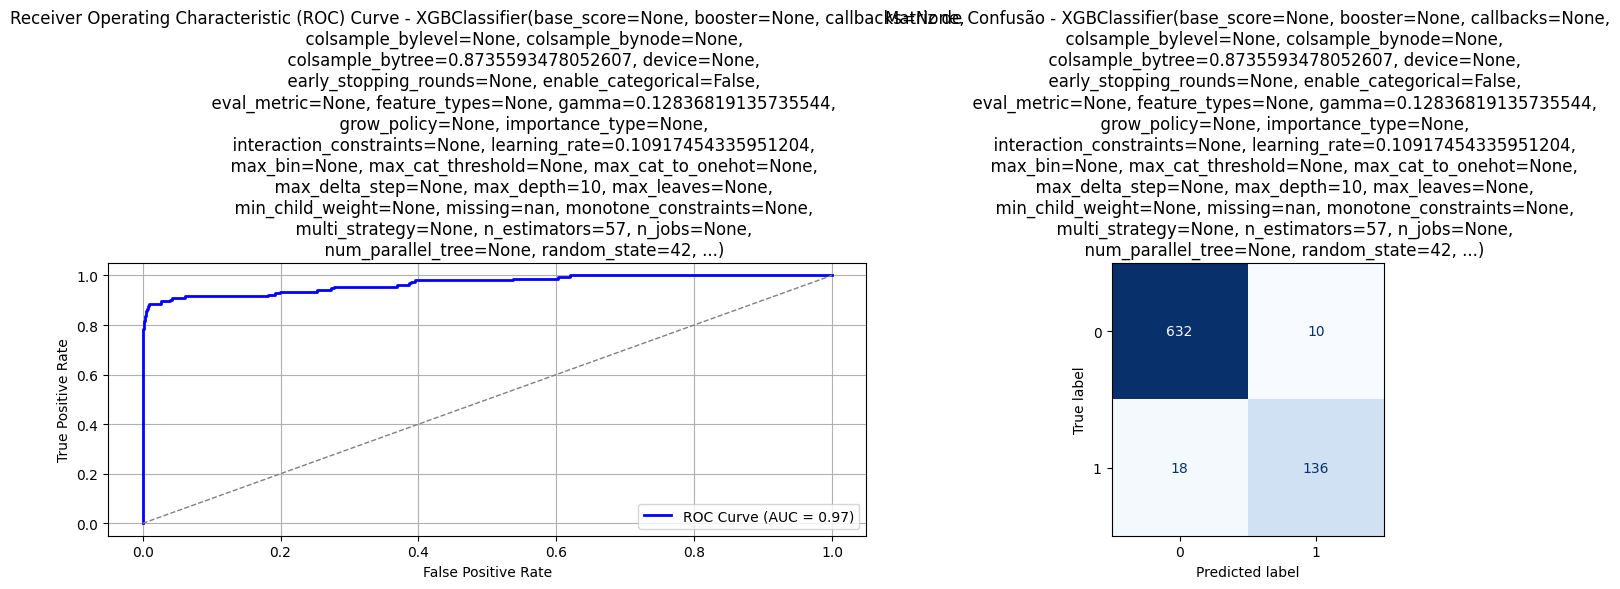


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.972308  0.984424  0.978328  642.000000
1              0.931507  0.883117  0.906667  154.000000
accuracy       0.964824  0.964824  0.964824    0.964824
macro avg      0.951907  0.933770  0.942497  796.000000
weighted avg   0.964414  0.964824  0.964464  796.000000

In [ ]:
# @title XG Boost + Optuna

def objective_XGB(trial):
  learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
  max_depth = trial.suggest_int('max_depth', 3, 10)
  n_estimators = trial.suggest_int('n_estimators', 50, 200)
  colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
  subsample = trial.suggest_float('subsample', 0.5, 1.0)
  gamma = trial.suggest_float('gamma', 0, 0.5)
  scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 3)

  model_XGB_Optuna = XGBClassifier(
      learning_rate=learning_rate,
      max_depth=max_depth,
      n_estimators=n_estimators,
      colsample_bytree=colsample_bytree,
      subsample=subsample,
      gamma=gamma,
      scale_pos_weight=scale_pos_weight,
      random_state=RANDOM_STATE
  )

  model_XGB_Optuna.fit(X_train, y_train)
  y_pred_XGB_Optuna = model_XGB_Optuna.predict(X_test)
  y_pred_proba_XGB_Optuna = model_XGB_Optuna.predict_proba(X_test)[:, 1]
  score_XGB_Optuna =  cross_val_score(model_XGB_Optuna, X_train, y_train, cv=5, scoring='roc_auc').mean()
  return score_XGB_Optuna

study_XGB_Optuna = optuna.create_study(direction='maximize')
study_XGB_Optuna.optimize(objective_XGB, n_trials=100)

print('Best parameters:', study_XGB_Optuna.best_params)
print('Best score:', study_XGB_Optuna.best_value)

model_XGB_Optuna = XGBClassifier(**study_XGB_Optuna.best_params, random_state=RANDOM_STATE)
model_XGB_Optuna.fit(X_train, y_train)

y_pred_XGB_Optuna = model_XGB_Optuna.predict(X_test)
y_pred_proba_XGB_Optuna = model_XGB_Optuna.predict_proba(X_test)[:, 1]

plot_roc_and_confusion(y_test, y_pred_XGB_Optuna, y_pred_proba_XGB_Optuna, model_XGB_Optuna)
display_classification_report(y_test, y_pred_XGB_Optuna, model_XGB_Optuna)

# Visualização
optuna.visualization.plot_param_importances(study_XGB_Optuna)
optuna.visualization.plot_optimization_history(study_XGB_Optuna)

[I 2024-09-30 23:45:04,766] A new study created in memory with name: no-name-59c39217-ab72-4c58-be08-9f907d66a689
[I 2024-09-30 23:45:05,295] Trial 0 finished with value: 0.9580729025944006 and parameters: {'learning_rate': 0.09573076206892592, 'max_depth': 3, 'n_estimators': 113, 'colsample_bytree': 0.9162261593399545, 'subsample': 0.6648781639025805, 'gamma': 0.3960083019770828, 'scale_pos_weight': 2}. Best is trial 0 with value: 0.9580729025944006.
[I 2024-09-30 23:45:05,994] Trial 1 finished with value: 0.9557674692903542 and parameters: {'learning_rate': 0.21751332853262134, 'max_depth': 6, 'n_estimators': 134, 'colsample_bytree': 0.6127015899088002, 'subsample': 0.8692204884700976, 'gamma': 0.27185152788675176, 'scale_pos_weight': 3}. Best is trial 0 with value: 0.9580729025944006.
[I 2024-09-30 23:45:06,555] Trial 2 finished with value: 0.9550835279684101 and parameters: {'learning_rate': 0.0815217296147774, 'max_depth': 6, 'n_estimators': 63, 'colsample_bytree': 0.5838270728725

Best parameters: {'learning_rate': 0.10869051800518427, 'max_depth': 10, 'n_estimators': 149, 'colsample_bytree': 0.969209717533747, 'subsample': 0.975760042608286, 'gamma': 0.4734056670524885, 'scale_pos_weight': 2}
Best score: 0.9652572885582595


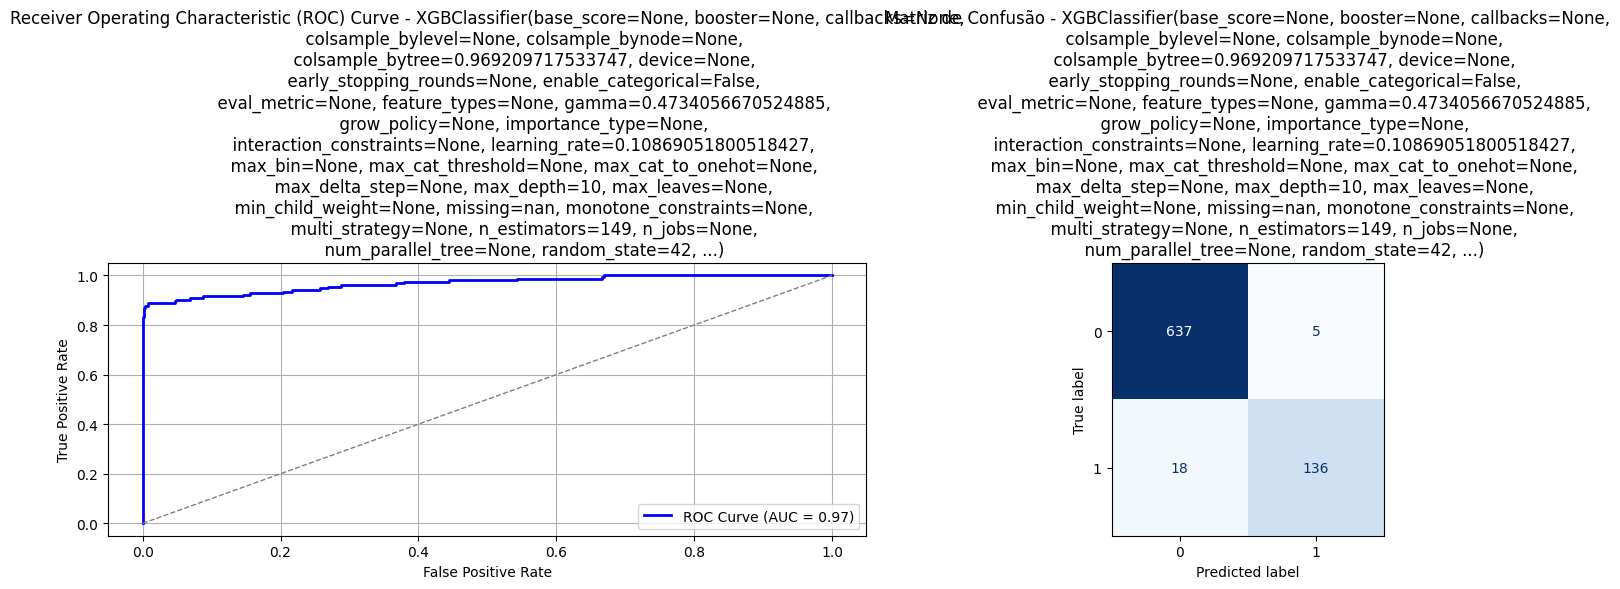


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.972519  0.992212  0.982267  642.000000
1              0.964539  0.883117  0.922034  154.000000
accuracy       0.971106  0.971106  0.971106    0.971106
macro avg      0.968529  0.937664  0.952150  796.000000
weighted avg   0.970975  0.971106  0.970614  796.000000

In [ ]:
# @title XG Boost + Optuna + Prune
def objective_XGB_Prune(trial):
  learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
  max_depth = trial.suggest_int('max_depth', 3, 10)
  n_estimators = trial.suggest_int('n_estimators', 50, 200)
  colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
  subsample = trial.suggest_float('subsample', 0.5, 1.0)
  gamma = trial.suggest_float('gamma', 0, 0.5)
  scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 3)

  model_XGB_Optuna_Prune = XGBClassifier(
      learning_rate=learning_rate,
      max_depth=max_depth,
      n_estimators=n_estimators,
      colsample_bytree=colsample_bytree,
      subsample=subsample,
      gamma=gamma,
      scale_pos_weight=scale_pos_weight,
      random_state=RANDOM_STATE
  )

  model_XGB_Optuna_Prune.fit(X_train, y_train)
  y_pred_XGB_Optuna_Prune = model_XGB_Optuna_Prune.predict(X_test)
  y_pred_proba_XGB_Optuna_Prune = model_XGB_Optuna_Prune.predict_proba(X_test)[:, 1]
  score_XGB_Optuna_Prune = cross_val_score(model_XGB_Optuna_Prune , X_train, y_train, cv=5, scoring='roc_auc').mean()

  # Pruning
  if trial.should_prune():
    raise optuna.exceptions.TrialPruned()

  return score_XGB_Optuna_Prune

# Paralelização
study_XGB_Optuna_Prune = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study_XGB_Optuna_Prune.optimize(objective_XGB_Prune, n_trials=100)

print('Best parameters:', study_XGB_Optuna_Prune.best_params)
print('Best score:', study_XGB_Optuna_Prune.best_value)

model_XGB_Optuna_Prune = XGBClassifier(**study_XGB_Optuna_Prune.best_params, random_state=RANDOM_STATE)
model_XGB_Optuna_Prune.fit(X_train, y_train)

y_pred_XGB_Optuna_Prune = model_XGB_Optuna_Prune.predict(X_test)
y_pred_proba_XGB_Optuna_Prune = model_XGB_Optuna_Prune.predict_proba(X_test)[:, 1]

plot_roc_and_confusion(y_test, y_pred_XGB_Optuna_Prune, y_pred_proba_XGB_Optuna_Prune, model_XGB_Optuna_Prune)
display_classification_report(y_test, y_pred_XGB_Optuna_Prune, model_XGB_Optuna_Prune)

# Visualização
optuna.visualization.plot_param_importances(study_XGB_Optuna_Prune)
optuna.visualization.plot_optimization_history(study_XGB_Optuna_Prune)

# Comparação XG Boost

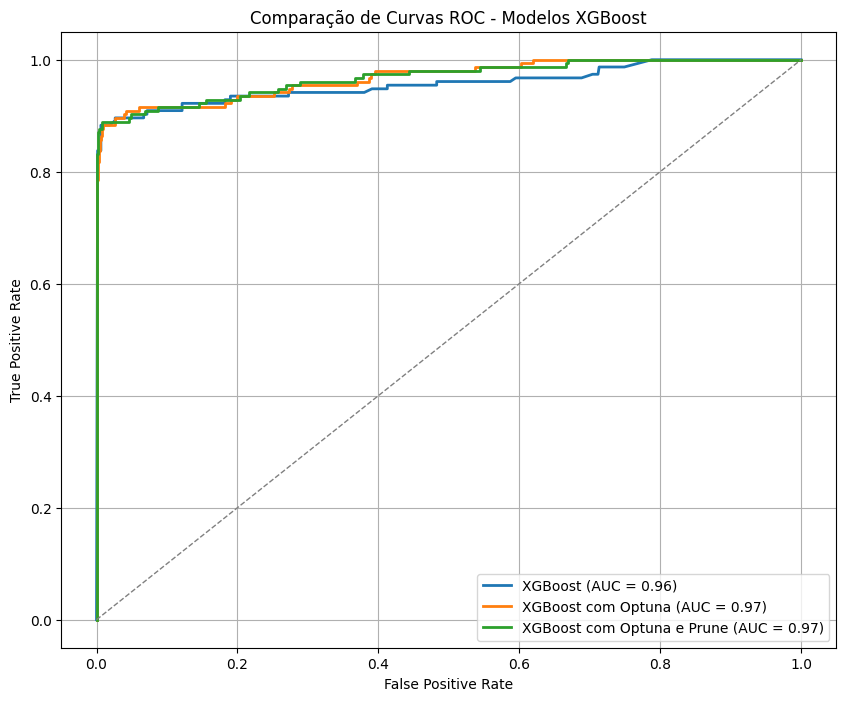

<ipython-input-58-66b124aa5e4a>:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Modelo  Precisão  Recall  F1-Score  Acurácia
0                     XGBoost     0.968   0.967     0.966     0.967
1          XGBoost com Optuna     0.964   0.965     0.964     0.965
2  XGBoost com Optuna e Prune     0.971   0.971     0.971     0.971

In [ ]:
# @title Métricas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Lista de modelos e suas respectivas previsões
models_XGB = [
    ("XGBoost", model_XGB, y_XGB_pred, y_XGB_pred_proba),
    ("XGBoost com Optuna", model_XGB_Optuna, y_pred_XGB_Optuna, y_pred_proba_XGB_Optuna),
    ("XGBoost com Optuna e Prune", model_XGB_Optuna_Prune, y_pred_XGB_Optuna_Prune, y_pred_proba_XGB_Optuna_Prune),
]

# Plotando as curvas ROC
plt.figure(figsize=(10, 8))
for name, model, y_pred_temp, y_pred_proba_temp in models_XGB:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_temp)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparação de Curvas ROC - Modelos XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Criando um DataFrame para comparar as métricas de classificação
metrics_XGB = pd.DataFrame(columns=['Modelo', 'Precisão', 'Recall', 'F1-Score'])

for name, model, y_pred_temp, _ in models_XGB:
    report_XGB = classification_report(y_test, y_pred_temp, output_dict=True)
    metrics_XGB = pd.concat([metrics_XGB, pd.DataFrame([{
    'Modelo': name,
    'Acurácia': report_XGB['accuracy'],
    'Precisão': report_XGB['weighted avg']['precision'],
    'Recall': report_XGB['weighted avg']['recall'],
    'F1-Score': report_XGB['weighted avg']['f1-score']
}])], ignore_index=True)

# Exibindo o DataFrame com as métricas
display(metrics_XGB.round(3))

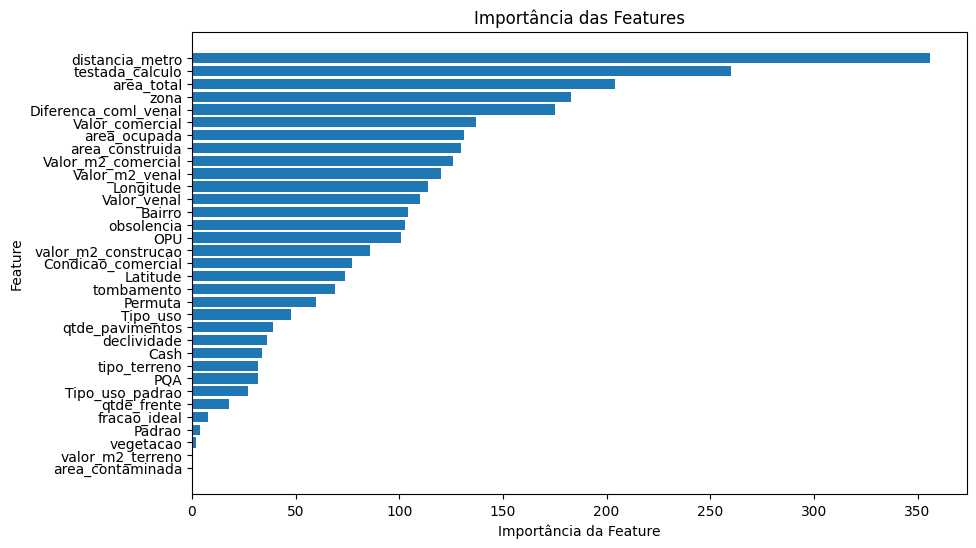

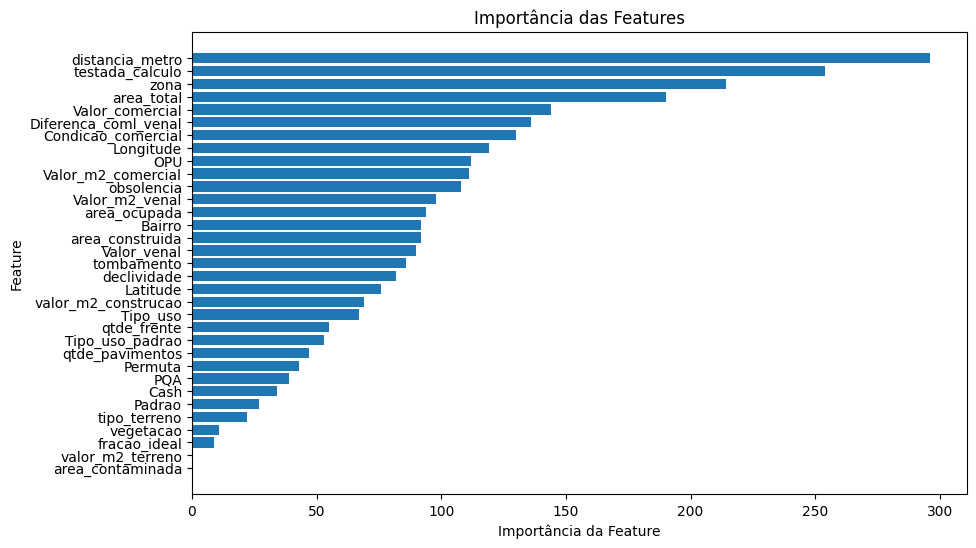

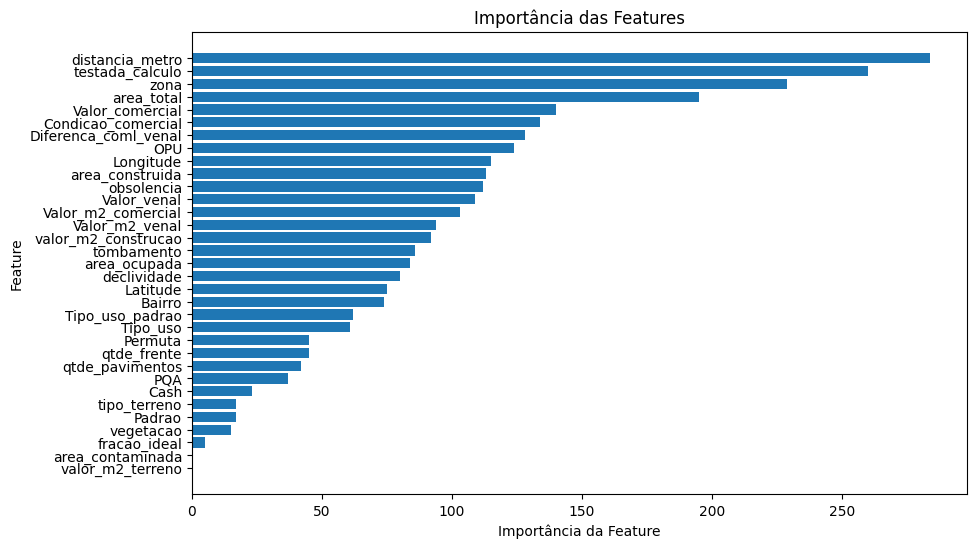

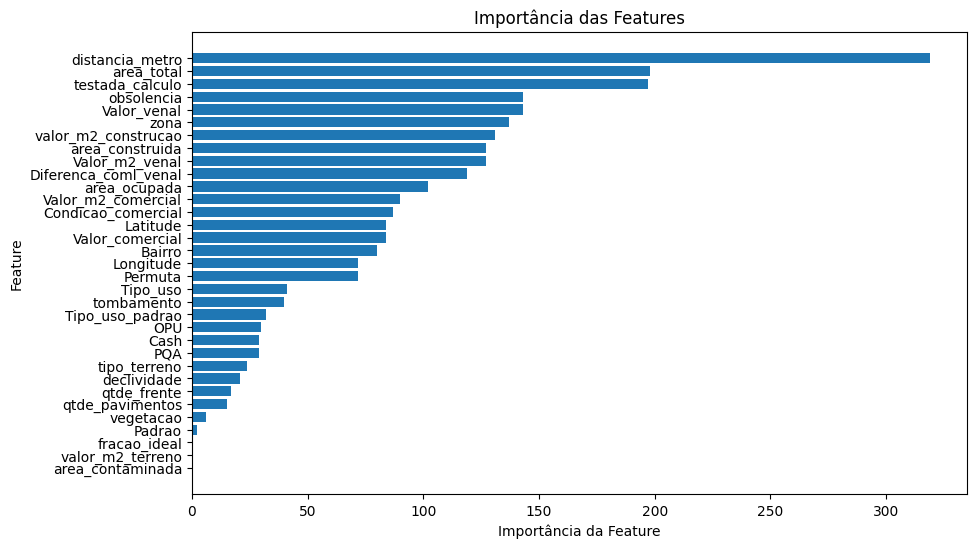

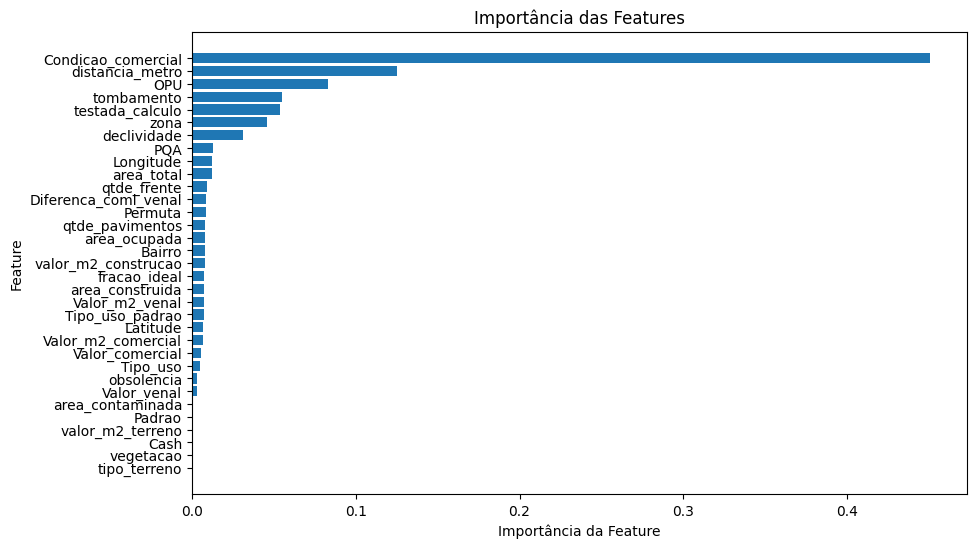

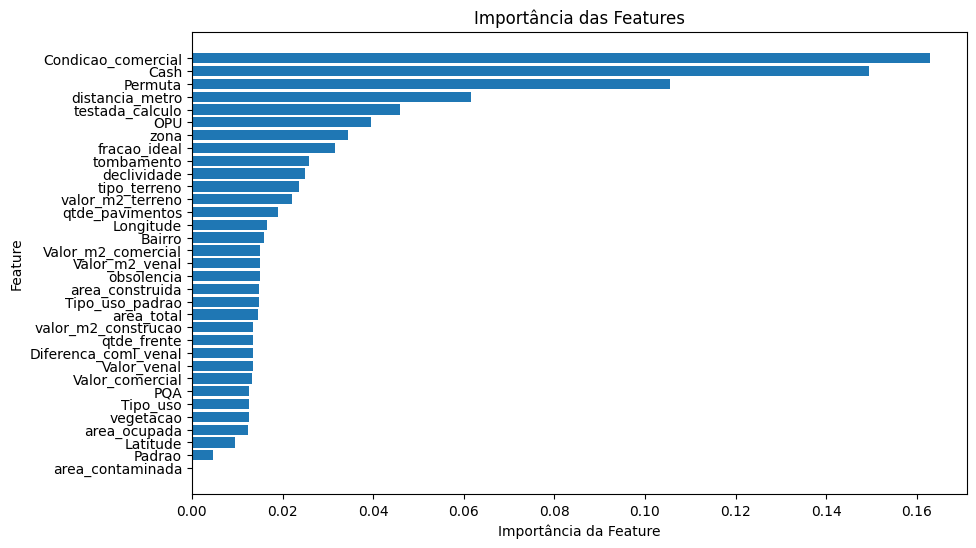

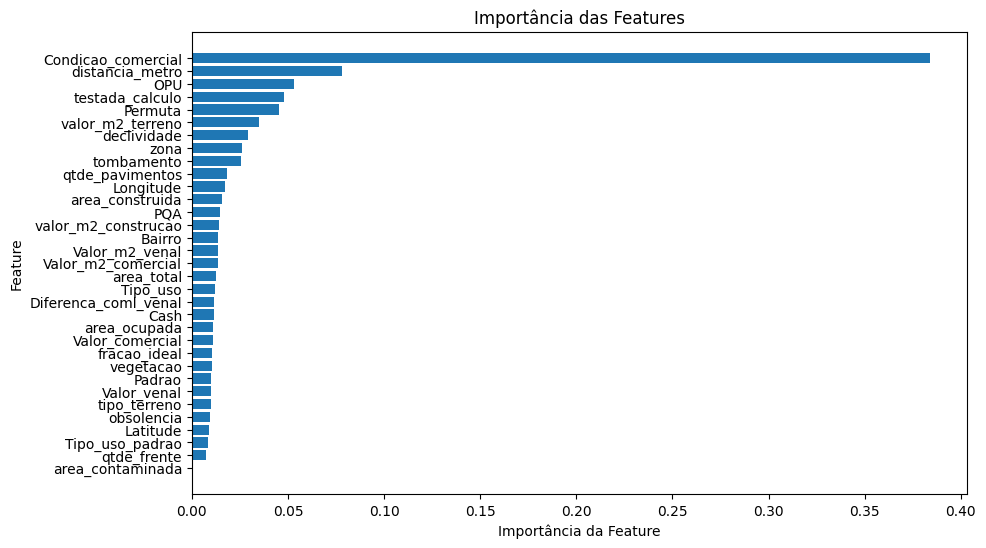

In [ ]:
# prompt: comparar as variáveis em gráfico de barra de cada modelo, plot_feature_importance(model, X_train.columns

import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importance_bar(model, feature_names):
  """Plota a importância das features em um gráfico de barras."""

  feature_importances = model.feature_importances_
  sorted_idx = np.argsort(feature_importances)

  plt.figure(figsize=(10, 6))
  plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
  plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
  plt.xlabel('Importância da Feature')
  plt.ylabel('Feature')
  plt.title('Importância das Features')
  plt.show()


plot_feature_importance_bar(model_LGBM, X_train.columns)
plot_feature_importance_bar(model_LGBM_Smote, X_train.columns)
plot_feature_importance_bar(model_LGBM_SmoteTomek, X_train.columns)
plot_feature_importance_bar(model_LGBM_rus, X_train.columns)
plot_feature_importance_bar(model_XGB, X_train.columns)
plot_feature_importance_bar(model_XGB_Optuna, X_train.columns)
plot_feature_importance_bar(model_XGB_Optuna_Prune, X_train.columns)


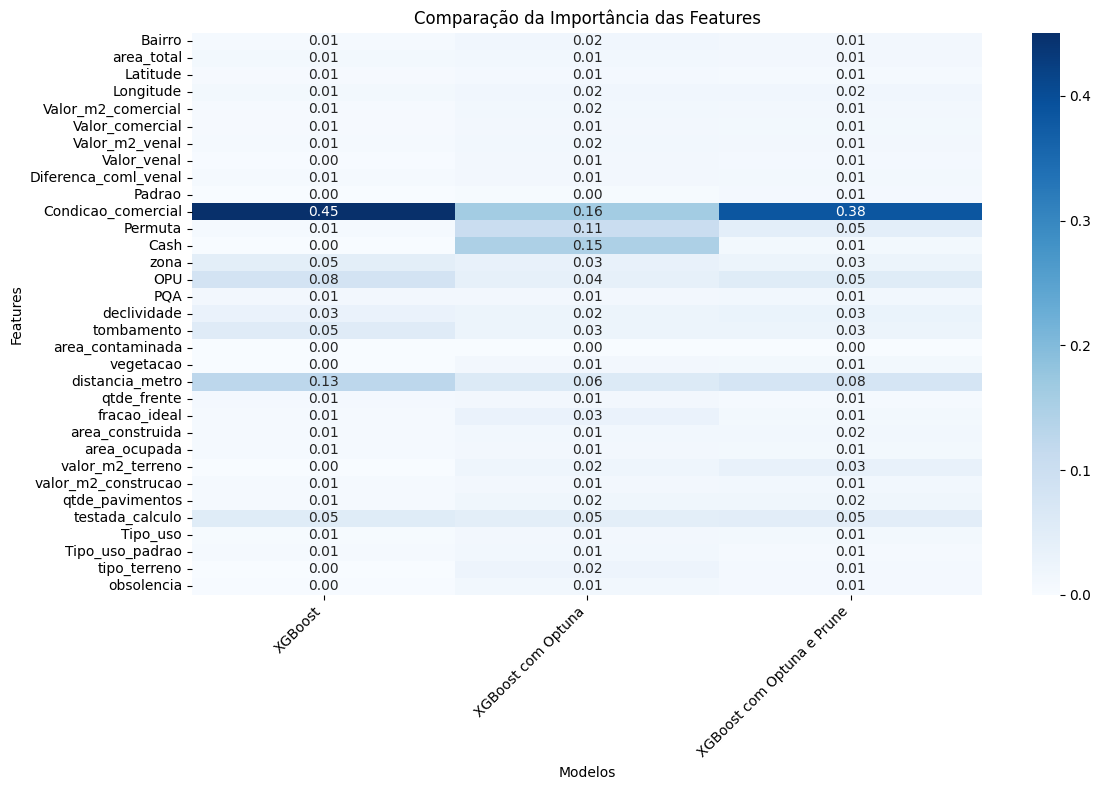

In [ ]:
# @title Variáveis

# Lista de modelos e seus nomes
models = [
    ("XGBoost", model_XGB),
    ("XGBoost com Optuna", model_XGB_Optuna),
    ("XGBoost com Optuna e Prune", model_XGB_Optuna_Prune)
]

# Criando um DataFrame para armazenar as importâncias das features
feature_importances_df = pd.DataFrame()

# Extraindo as importâncias das features de cada modelo
for name, model in models:
    feature_importances = model.feature_importances_
    feature_importances_df[name] = feature_importances

# Definindo os nomes das features (substitua pelos nomes corretos)
feature_names = X_train.columns
feature_importances_df.index = feature_names

# Normalizando as importâncias das features para cada modelo (0 a 1)
feature_importances_df = feature_importances_df.apply(lambda x: x / x.sum(), axis=0)

# Plotando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importances_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Comparação da Importância das Features')
plt.xlabel('Modelos')
plt.ylabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

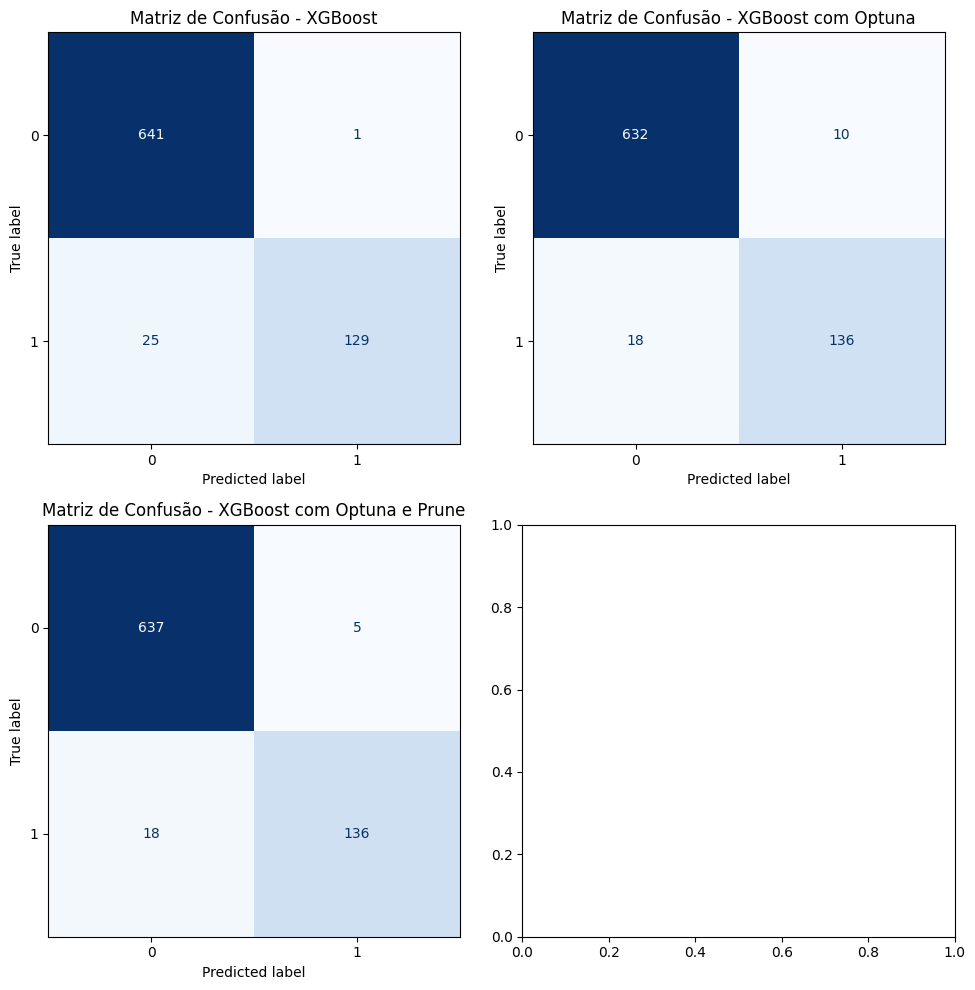

In [ ]:
# @title Matrizes de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Lista de modelos e suas respectivas previsões
models = [
    ("XGBoost", model_XGB, y_XGB_pred),
    ("XGBoost com Optuna", model_XGB_Optuna, y_pred_XGB_Optuna),
    ("XGBoost com Optuna e Prune", model_XGB_Optuna_Prune, y_pred_XGB_Optuna_Prune),
]

# Plotando as matrizes de confusão
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Mantém o tamanho da figura como 8x8

# Loop pelos modelos
for i, (name, model, y_pred_temp) in enumerate(models):
    row = i // 2
    col = i % 2
    cm = confusion_matrix(y_test, y_pred_temp)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes[row, col], colorbar=False)
    axes[row, col].set_title(f'Matriz de Confusão - {name}')

# Ajusta o espaçamento entre as colunas (wspace) e as linhas (hspace)
plt.subplots_adjust(wspace= 2, hspace= 2)  # Aumenta o espaço horizontal e vertical

plt.tight_layout()
plt.show()

In [ ]:
# @title Matriz de confusão métricas

import pandas as pd
import numpy as np
# Lista de modelos e suas respectivas previsões
models = [
    ("XGBoost", model_XGB, y_XGB_pred),
    ("XGBoost com Optuna", model_XGB_Optuna, y_pred_XGB_Optuna),
    ("XGBoost com Optuna e Prune", model_XGB_Optuna_Prune, y_pred_XGB_Optuna_Prune)
]

# Criando um DataFrame para armazenar as métricas
metrics_df = pd.DataFrame(columns=['Modelo', 'Verdadeiro Positivo (%)', 'Falso Positivo (%)',
                                   'Verdadeiro Negativo (%)', 'Falso Negativo (%)'])

# Loop pelos modelos
for name, model, y_pred_temp in models:
    cm = confusion_matrix(y_test, y_pred_temp)
    total = np.sum(cm)
    metrics_df = pd.concat([metrics_df, pd.DataFrame([{
        'Modelo': name,
        'Verdadeiro Positivo (%)': (cm[1, 1] / total) * 100,
        'Falso Positivo (%)': (cm[0, 1] / total) * 100,
        'Verdadeiro Negativo (%)': (cm[0, 0] / total) * 100,
        'Falso Negativo (%)': (cm[1, 0] / total) * 100
    }])], ignore_index=True)

# Exibindo o DataFrame com as métricas em porcentagem
display(metrics_df.round(2))

<ipython-input-61-27c07cde57d9>:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Modelo  Verdadeiro Positivo (%)  Falso Positivo (%)  \
0                     XGBoost                    16.21                0.13   
1          XGBoost com Optuna                    17.09                1.26   
2  XGBoost com Optuna e Prune                    17.09                0.63   

   Verdadeiro Negativo (%)  Falso Negativo (%)  
0                    80.53                3.14  
1                    79.40                2.26  
2                    80.03                2.26

# Random Forest

In [ ]:
# instanciar o modelo Random Forest
model_RFC = RandomForestClassifier(
    class_weight='balanced',
    random_state=RANDOM_STATE)  # `class_weight='balanced'` lida com desbalanceamento
model_RFC.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Avaliação do Modelo
y_RFC_pred = model_RFC.predict(X_test)
y_RFC_pred_proba = model_RFC.predict_proba(X_test)[:, 1]
threshold = 0.5  # Ajuste o threshold para algo mais moderado
y_RFC_pred_adjusted = (y_RFC_pred_proba >= threshold).astype(int)

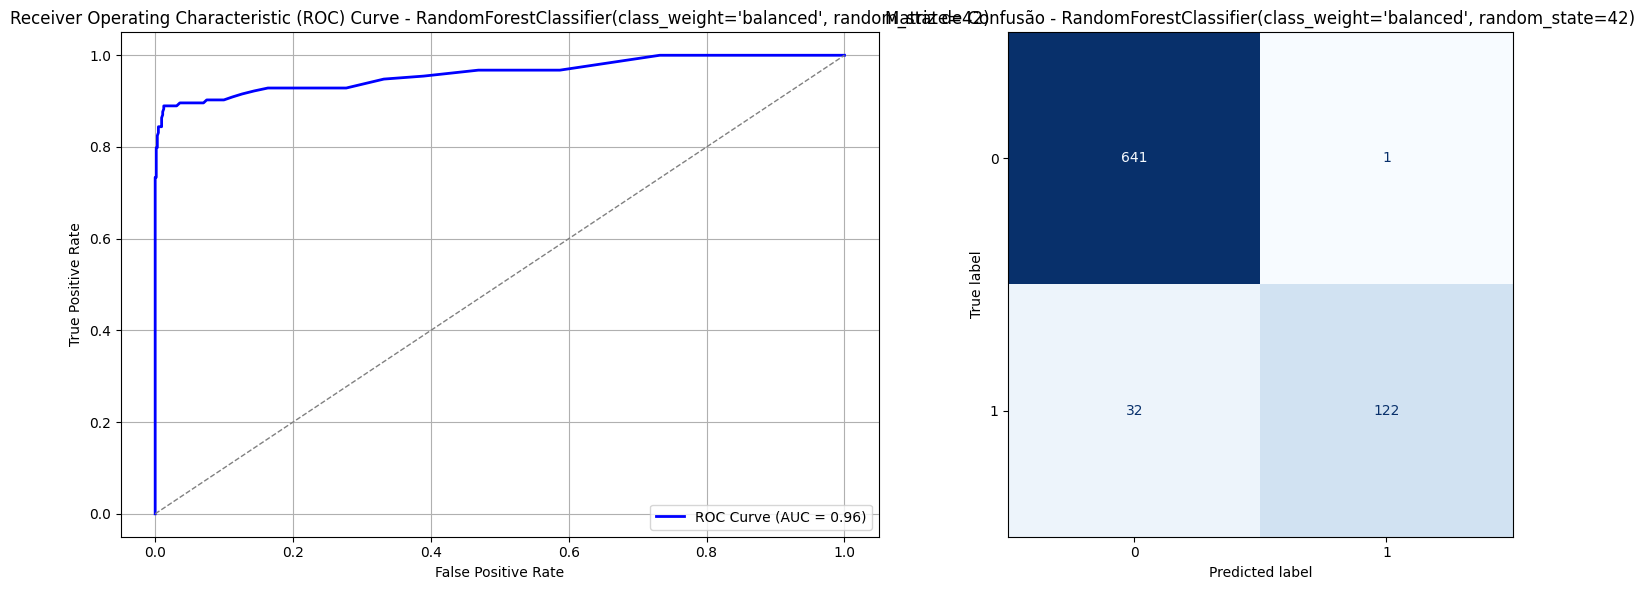


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.952452  0.998442  0.974905  642.000000
1              0.991870  0.792208  0.880866  154.000000
accuracy       0.958543  0.958543  0.958543    0.958543
macro avg      0.972161  0.895325  0.927886  796.000000
weighted avg   0.960078  0.958543  0.956712  796.000000

In [ ]:
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_RFC_pred, y_RFC_pred_proba, model_RFC)
display_classification_report(y_test, y_RFC_pred, model_RFC)

[I 2024-09-30 23:52:23,247] A new study created in memory with name: no-name-fe97beb4-41ea-4809-b270-ed5213bc61b0
[I 2024-09-30 23:52:23,762] Trial 0 finished with value: 0.9635678391959799 and parameters: {'n_estimators': 172, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9635678391959799.
[I 2024-09-30 23:52:24,220] Trial 1 finished with value: 0.9585427135678392 and parameters: {'n_estimators': 150, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9635678391959799.
[I 2024-09-30 23:52:24,533] Trial 2 finished with value: 0.9246231155778895 and parameters: {'n_estimators': 147, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9635678391959799.
[I 2024-09-30 23:52:24,908] Trial 3 finished with value: 0.9032663316582915 and parameters: {'n_estimators': 198, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 0 with value:

Best parameters: {'n_estimators': 166, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1}
Best score: 0.9685929648241206


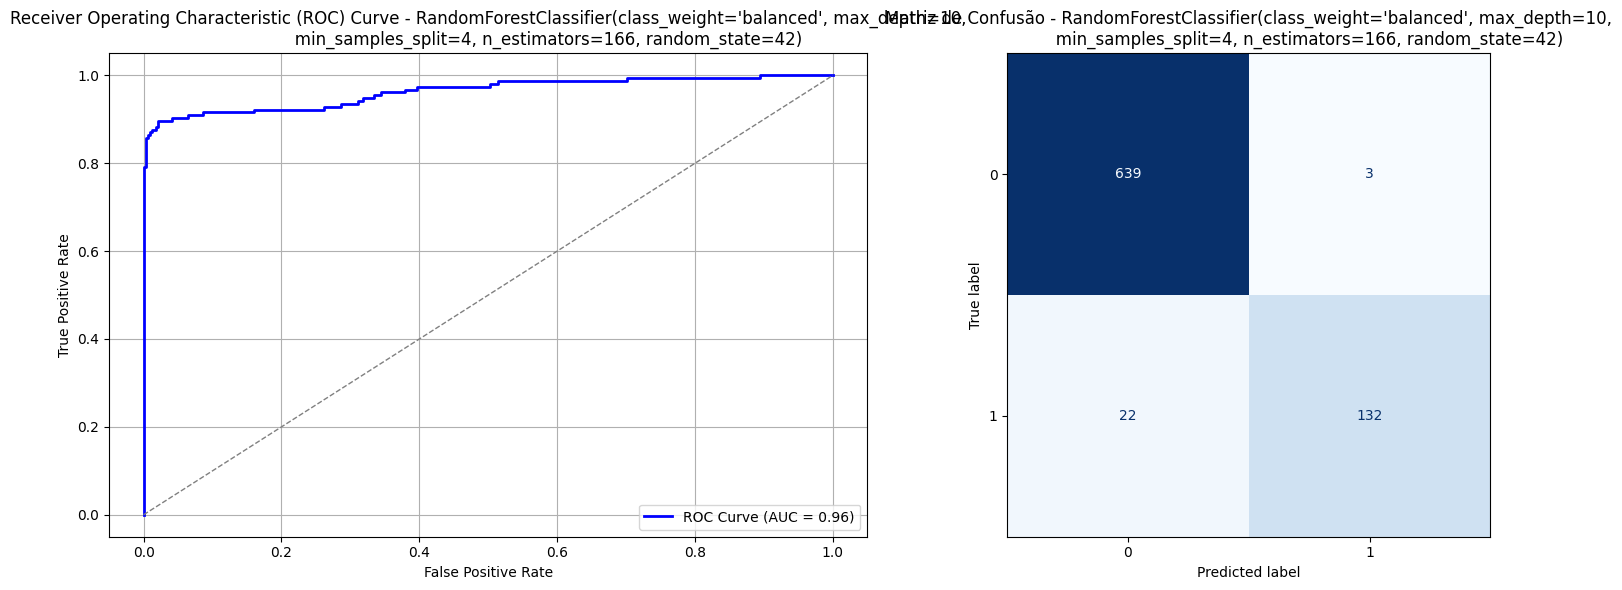


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.966717  0.995327  0.980814  642.000000
1              0.977778  0.857143  0.913495  154.000000
accuracy       0.968593  0.968593  0.968593    0.968593
macro avg      0.972247  0.926235  0.947154  796.000000
weighted avg   0.968857  0.968593  0.967790  796.000000

In [ ]:
# @title Random Forest + Optuna

def objective_RFC_Optuna(trial):
  n_estimators = trial.suggest_int('n_estimators', 50, 200)
  max_depth = trial.suggest_int('max_depth', 3, 10)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

  RFC_Optuna = RandomForestClassifier(
      n_estimators=n_estimators,
      max_depth=max_depth,
      min_samples_split=min_samples_split,
      min_samples_leaf=min_samples_leaf,
      random_state=RANDOM_STATE,
      class_weight='balanced'
  )

  RFC_Optuna.fit(X_train, y_train)
  y_RFC_Optuna_pred = RFC_Optuna.predict(X_test)
  score_RFC_Optuna = accuracy_score(y_test, y_RFC_Optuna_pred)

  return score_RFC_Optuna

study_RFC_Optuna = optuna.create_study(direction='maximize')
study_RFC_Optuna.optimize(objective_RFC_Optuna, n_trials=100)

print('Best parameters:', study_RFC_Optuna.best_params)
print('Best score:', study_RFC_Optuna.best_value)

# Treinar o modelo com os melhores parâmetros encontrados
best_params_RFC_Optuna = study_RFC_Optuna.best_params
model_RFC_Optuna = RandomForestClassifier(**best_params_RFC_Optuna, random_state=RANDOM_STATE, class_weight='balanced')
model_RFC_Optuna.fit(X_train, y_train)

# Avaliação do Modelo
y_RFC_Optuna_pred = model_RFC_Optuna.predict(X_test)
y_RFC_Optuna_pred_proba = model_RFC_Optuna.predict_proba(X_test)[:, 1]
threshold = 0.5  # Ajuste o threshold para algo mais moderado
y_RFC_optuna_pred_adjusted = (y_RFC_Optuna_pred_proba >= threshold).astype(int)

# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_RFC_Optuna_pred, y_RFC_Optuna_pred_proba, model_RFC_Optuna)
display_classification_report(y_test, y_RFC_Optuna_pred, model_RFC_Optuna)

optuna.visualization.plot_param_importances(study_RFC_Optuna)
optuna.visualization.plot_optimization_history(study_RFC_Optuna)

[I 2024-09-30 23:53:04,551] A new study created in memory with name: no-name-da09f70d-6be6-43c4-ae7b-b4079166107c
[I 2024-09-30 23:53:06,523] Trial 0 finished with value: 0.9326971567689766 and parameters: {'n_estimators': 157, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9326971567689766.
[I 2024-09-30 23:53:08,795] Trial 1 finished with value: 0.9483146393067271 and parameters: {'n_estimators': 151, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9483146393067271.
[I 2024-09-30 23:53:10,225] Trial 2 finished with value: 0.8842245601831724 and parameters: {'n_estimators': 140, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9483146393067271.
[I 2024-09-30 23:53:11,697] Trial 3 finished with value: 0.9493957047213286 and parameters: {'n_estimators': 101, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 3 with value: 0

Best parameters: {'n_estimators': 71, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best score: 0.9553154798133496
Best parameters: {'n_estimators': 71, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best score: 0.9553154798133496


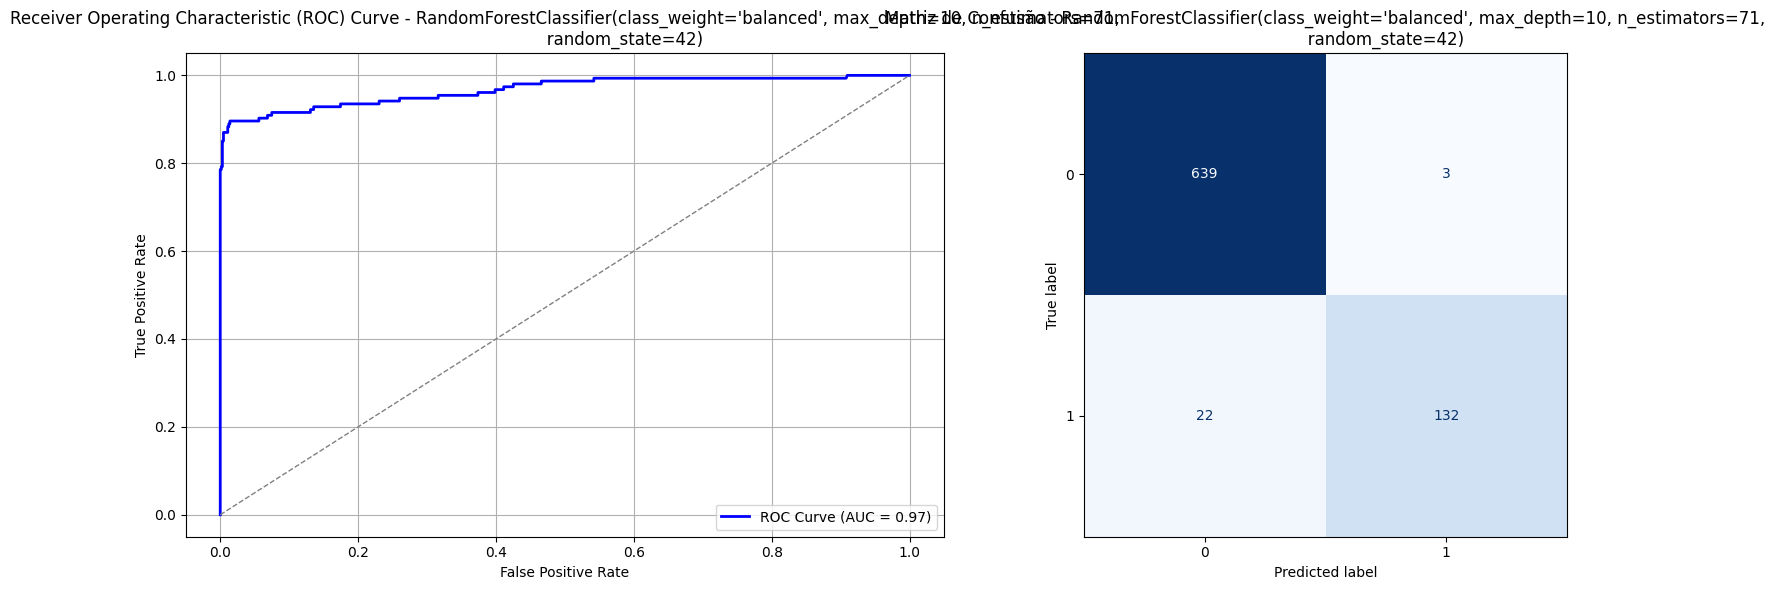

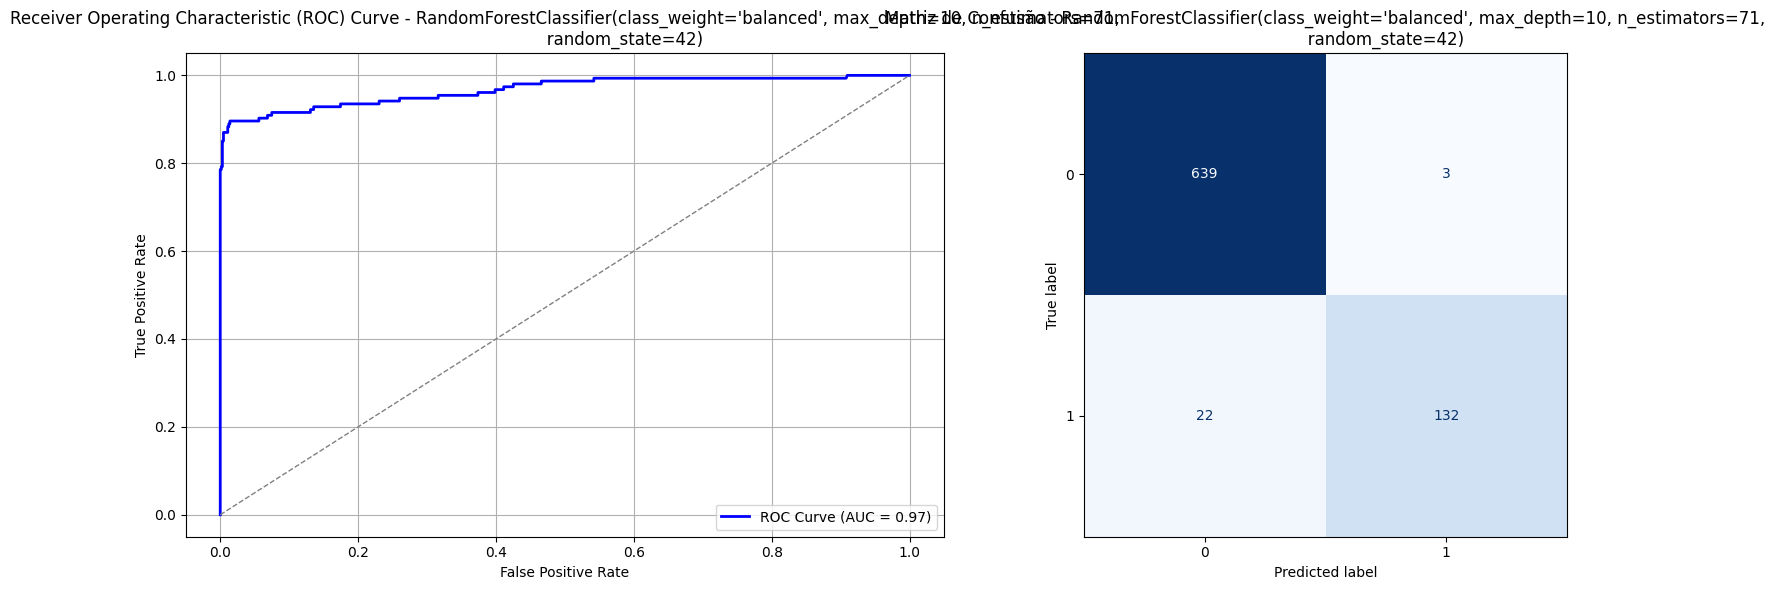


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.966717  0.995327  0.980814  642.000000
1              0.977778  0.857143  0.913495  154.000000
accuracy       0.968593  0.968593  0.968593    0.968593
macro avg      0.972247  0.926235  0.947154  796.000000
weighted avg   0.968857  0.968593  0.967790  796.000000

precision    recall  f1-score     support
0              0.966717  0.995327  0.980814  642.000000
1              0.977778  0.857143  0.913495  154.000000
accuracy       0.968593  0.968593  0.968593    0.968593
macro avg      0.972247  0.926235  0.947154  796.000000
weighted avg   0.968857  0.968593  0.967790  796.000000

In [ ]:
# @title Random Forest + Optuna + Prune

def objective_RFC_Optuna_Prune(trial):
  n_estimators = trial.suggest_int('n_estimators', 50, 200)
  max_depth = trial.suggest_int('max_depth', 3, 10)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

  RFC_Optuna_Prune = RandomForestClassifier(
      n_estimators=n_estimators,
      max_depth=max_depth,
      min_samples_split=min_samples_split,
      min_samples_leaf=min_samples_leaf,
      random_state=RANDOM_STATE,
      class_weight='balanced'
  )

  RFC_Optuna_Prune.fit(X_train, y_train)
  y_RFC_Optuna_Prune_pred = RFC_Optuna_Prune.predict(X_test)
  score_RFC_Optuna_Prune = cross_val_score(RFC_Optuna_Prune, X_train, y_train, cv=5, scoring='accuracy').mean()

  if trial.should_prune():
    raise optuna.exceptions.TrialPruned()

  return score_RFC_Optuna_Prune

study_RFC_Optuna_Prune = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study_RFC_Optuna_Prune.optimize(objective_RFC_Optuna_Prune, n_trials=100)

print('Best parameters:', study_RFC_Optuna_Prune.best_params)
print('Best score:', study_RFC_Optuna_Prune.best_value)

best_params_RFC_Optuna_Prune = study_RFC_Optuna_Prune.best_params
model_RFC_Optuna_Prune = RandomForestClassifier(**best_params_RFC_Optuna_Prune, random_state=RANDOM_STATE, class_weight='balanced')
model_RFC_Optuna_Prune.fit(X_train, y_train)

y_RFC_Optuna_Prune_pred = model_RFC_Optuna_Prune.predict(X_test)
y_RFC_Optuna_Prune_pred_proba = model_RFC_Optuna_Prune.predict_proba(X_test)[:, 1]

plot_roc_and_confusion(y_test, y_RFC_Optuna_Prune_pred, y_RFC_Optuna_Prune_pred_proba, model_RFC_Optuna_Prune)
display_classification_report(y_test, y_RFC_Optuna_Prune_pred, model_RFC_Optuna_Prune)

optuna.visualization.plot_param_importances(study_RFC_Optuna_Prune)
optuna.visualization.plot_optimization_history(study_RFC_Optuna_Prune)

# Comparação Random Forest

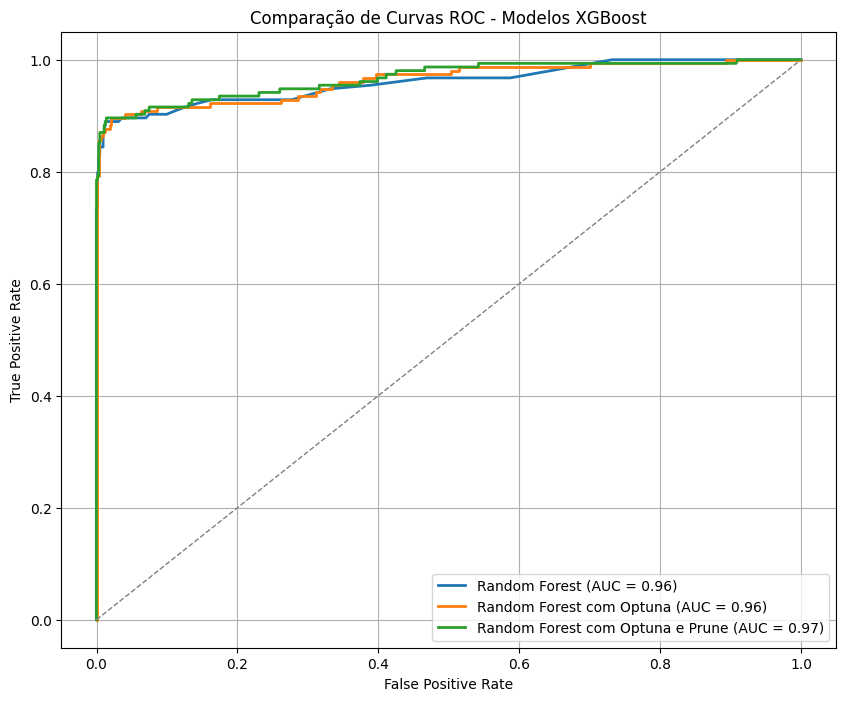

<ipython-input-114-cd61f03ca1c6>:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Modelo  Precisão  Recall  F1-Score  Acurácia
0                     Random Forest     0.960   0.959     0.957     0.959
1          Random Forest com Optuna     0.969   0.969     0.968     0.969
2  Random Forest com Optuna e Prune     0.969   0.969     0.968     0.969

In [ ]:
# @title Métricas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Lista de modelos e suas respectivas previsões
models_RFC = [
    ("Random Forest", model_RFC, y_RFC_pred, y_RFC_pred_proba),
    ("Random Forest com Optuna", model_RFC_Optuna, y_RFC_Optuna_pred, y_RFC_Optuna_pred_proba),
    ("Random Forest com Optuna e Prune", model_RFC_Optuna_Prune, y_RFC_Optuna_Prune_pred, y_RFC_Optuna_Prune_pred_proba),
]

# Plotando as curvas ROC
plt.figure(figsize=(10, 8))
for name, model, y_pred_temp, y_pred_proba_temp in models_RFC:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_temp)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparação de Curvas ROC - Modelos XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Criando um DataFrame para comparar as métricas de classificação
metrics_RFC = pd.DataFrame(columns=['Modelo', 'Precisão', 'Recall', 'F1-Score'])

for name, model, y_pred_temp, _ in models_RFC:
    report_RFC = classification_report(y_test, y_pred_temp, output_dict=True)
    metrics_RFC = pd.concat([metrics_RFC, pd.DataFrame([{
    'Modelo': name,
    'Acurácia': report_RFC['accuracy'],
    'Precisão': report_RFC['weighted avg']['precision'],
    'Recall': report_RFC['weighted avg']['recall'],
    'F1-Score': report_RFC['weighted avg']['f1-score']
}])], ignore_index=True)

# Exibindo o DataFrame com as métricas
display(metrics_RFC.round(3))

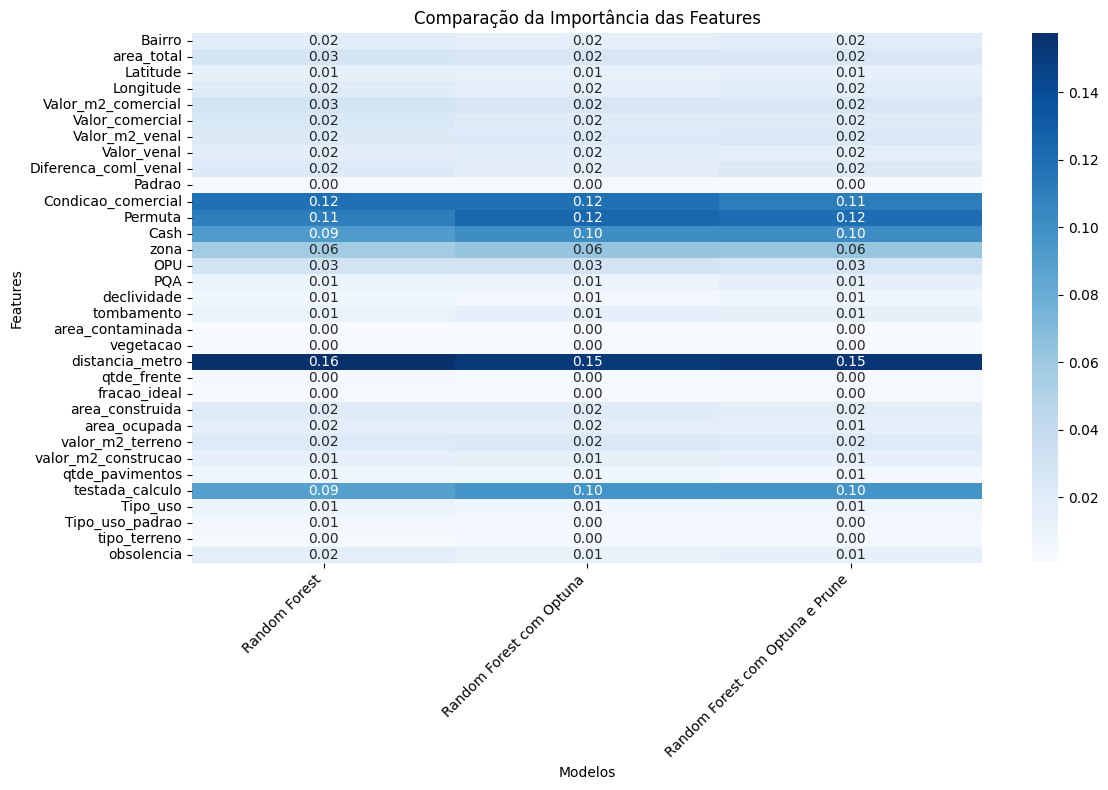

In [ ]:
# @title Variáveis

# Lista de modelos e seus nomes
models = [
    ("Random Forest", model_RFC),
    ("Random Forest com Optuna", model_RFC_Optuna),
    ("Random Forest com Optuna e Prune", model_RFC_Optuna_Prune)
]

# Criando um DataFrame para armazenar as importâncias das features
feature_importances_df = pd.DataFrame()

# Extraindo as importâncias das features de cada modelo
for name, model in models:
    feature_importances = model.feature_importances_
    feature_importances_df[name] = feature_importances

# Definindo os nomes das features (substitua pelos nomes corretos)
feature_names = X_train.columns
feature_importances_df.index = feature_names

# Normalizando as importâncias das features para cada modelo (0 a 1)
feature_importances_df = feature_importances_df.apply(lambda x: x / x.sum(), axis=0)

# Plotando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importances_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Comparação da Importância das Features')
plt.xlabel('Modelos')
plt.ylabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

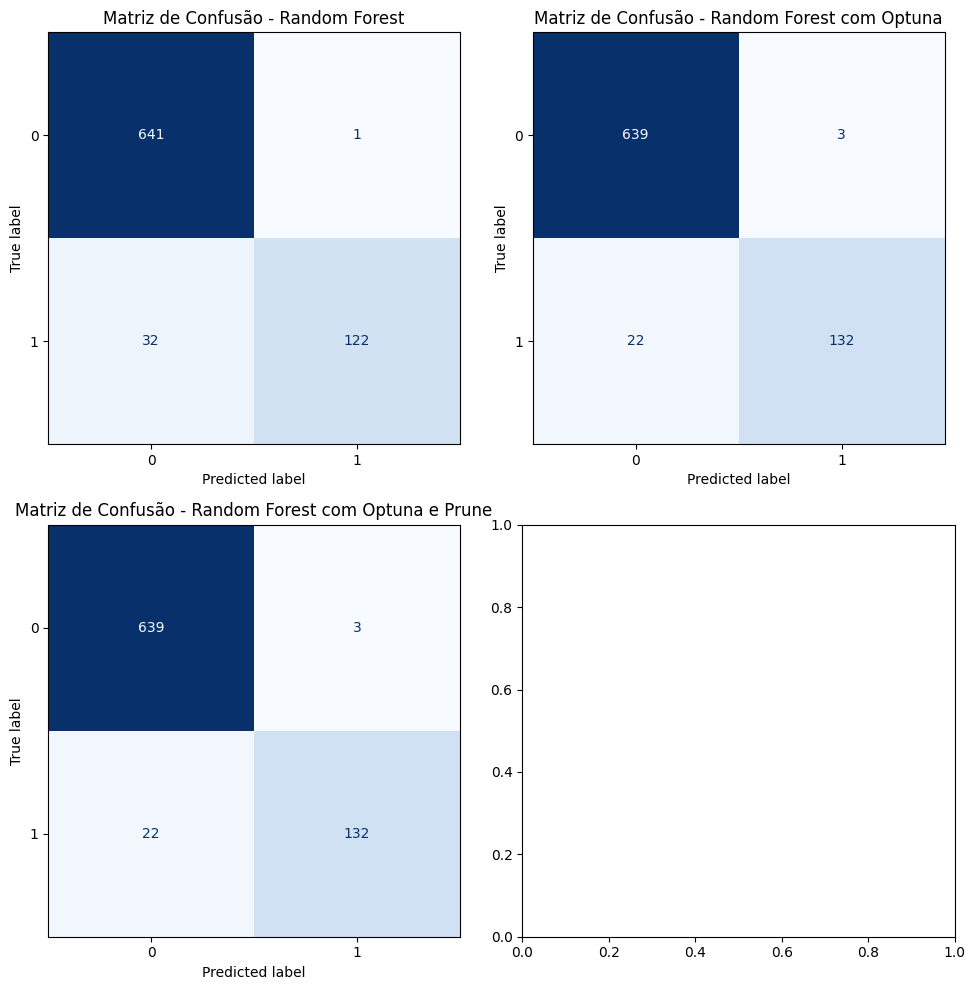

In [ ]:
# @title Matriz de confusão

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Lista de modelos e suas respectivas previsões
models = [
    ("Random Forest", model_RFC, y_RFC_pred),
    ("Random Forest com Optuna", model_RFC_Optuna, y_RFC_Optuna_pred),
    ("Random Forest com Optuna e Prune", model_RFC_Optuna_Prune, y_RFC_Optuna_Prune_pred)
]

# Plotando as matrizes de confusão
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Mantém o tamanho da figura como 8x8

# Loop pelos modelos
for i, (name, model, y_pred_temp) in enumerate(models):
    row = i // 2
    col = i % 2
    cm = confusion_matrix(y_test, y_pred_temp)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes[row, col], colorbar=False)
    axes[row, col].set_title(f'Matriz de Confusão - {name}')

# Ajusta o espaçamento entre as colunas (wspace) e as linhas (hspace)
plt.subplots_adjust(wspace= 2, hspace= 2)  # Aumenta o espaço horizontal e vertical

plt.tight_layout()
plt.show()

In [ ]:
# @title Matriz de confusão métricas

import pandas as pd
import numpy as np
# Lista de modelos e suas respectivas previsões
models = [
    ("Random Forest", model_RFC, y_RFC_pred),
    ("Random Forest com Optuna", model_RFC_Optuna, y_RFC_Optuna_pred),
    ("Random Forest com Optuna e Prune", model_RFC_Optuna_Prune, y_RFC_Optuna_Prune_pred)
]

# Criando um DataFrame para armazenar as métricas
metrics_df = pd.DataFrame(columns=['Modelo', 'Verdadeiro Positivo (%)', 'Falso Positivo (%)',
                                   'Verdadeiro Negativo (%)', 'Falso Negativo (%)'])

# Loop pelos modelos
for name, model, y_pred_temp in models:
    cm = confusion_matrix(y_test, y_pred_temp)
    total = np.sum(cm)
    metrics_df = pd.concat([metrics_df, pd.DataFrame([{
        'Modelo': name,
        'Verdadeiro Positivo (%)': (cm[1, 1] / total) * 100,
        'Falso Positivo (%)': (cm[0, 1] / total) * 100,
        'Verdadeiro Negativo (%)': (cm[0, 0] / total) * 100,
        'Falso Negativo (%)': (cm[1, 0] / total) * 100
    }])], ignore_index=True)

# Exibindo o DataFrame com as métricas em porcentagem
display(metrics_df.round(2))

<ipython-input-117-b00eda3e132f>:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Modelo  Verdadeiro Positivo (%)  \
0                     Random Forest                    15.33   
1          Random Forest com Optuna                    16.58   
2  Random Forest com Optuna e Prune                    16.58   

   Falso Positivo (%)  Verdadeiro Negativo (%)  Falso Negativo (%)  
0                0.13                    80.53                4.02  
1                0.38                    80.28                2.76  
2                0.38                    80.28                2.76

# **Balanced Random Forest Classifier + Optuna**

In [ ]:
# Suprimir logs do Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Ignorar avisos (warnings)
warnings.filterwarnings('ignore')

# Função objetivo para o Optuna com pruning
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0)
    }

    # Definindo o modelo com os parâmetros sugeridos
    model = BalancedRandomForestClassifier(**param, random_state=RANDOM_STATE)

    # Avaliação usando cross-validation com pruning
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=3,
                             scoring='recall')
    recall = scores.mean()

    # Relatar valor intermediário para o pruner
    trial.report(recall, step=0)

    # Pruning com base nos resultados intermediários
    if trial.should_prune():
        raise optuna.TrialPruned()

    return recall

# Criar o estudo com pruning
study = optuna.create_study(
    direction='maximize',
    pruner=MedianPruner(
        n_startup_trials=10,
        n_warmup_steps=0,
        interval_steps=1)
    )
study.optimize(objective, n_trials=100)

In [ ]:
# Melhor combinação de hiperparâmetros
best_params = study.best_params
print(f"Melhores hiperparâmetros encontrados: {best_params}")

Melhores hiperparâmetros encontrados: {'n_estimators': 845, 'max_depth': 30, 'min_samples_split': 11, 'min_samples_leaf': 20, 'max_features': 0.10173674796117953}


In [ ]:
# Treinar o modelo com os melhores hiperparâmetros
model_BRF = BalancedRandomForestClassifier(**best_params, random_state=RANDOM_STATE)
model_BRF.fit(X_train, y_train)

BalancedRandomForestClassifier(max_depth=30, max_features=0.10173674796117953,
                               min_samples_leaf=20, min_samples_split=11,
                               n_estimators=845, random_state=42)

In [ ]:
# Previsão
y_pred_brf = model_BRF.predict(X_test)
y_pred_brf_proba = model_BRF.predict_proba(X_test)[:, 1]

In [ ]:
from google.colab import files
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred_brf,
    'y_proba': y_pred_brf_proba,
})

# Salvar como arquivo CSVy_pred_brf
df.to_csv('dados_resultados.csv', index=False)
files.download('dados_resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

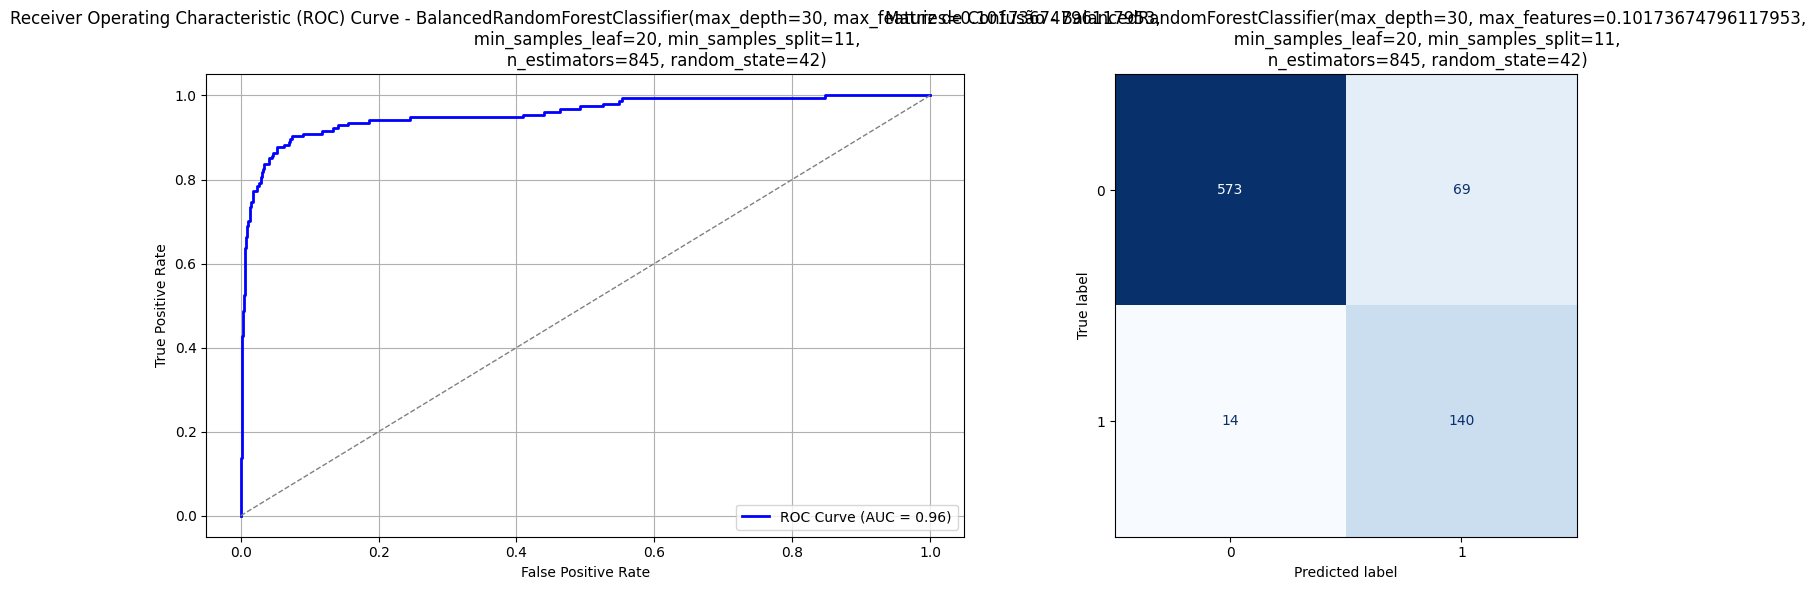


--------------------------------------------------------------------------------



precision    recall  f1-score     support
0              0.976150  0.892523  0.932465  642.000000
1              0.669856  0.909091  0.771350  154.000000
accuracy       0.895729  0.895729  0.895729    0.895729
macro avg      0.823003  0.900807  0.851908  796.000000
weighted avg   0.916892  0.895729  0.901295  796.000000

In [ ]:
# Executar as funções com os dados do modelo
plot_roc_and_confusion(y_test, y_pred_brf, y_pred_brf_proba, model_BRF)
display_classification_report(y_test, y_pred_brf, model_BRF)

In [ ]:
# prompt: Métricas da matriz de confusão

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Lista de modelos e suas respectivas previsões
models = [

    ("Balanced Random Forest", model_BRF, y_pred_brf)
]


# Criando um DataFrame para armazenar as métricas
metrics_df = pd.DataFrame(columns=['Modelo', 'Verdadeiro Positivo (%)', 'Falso Positivo (%)',
                                   'Verdadeiro Negativo (%)', 'Falso Negativo (%)'])

# Loop pelos modelos
for name, model, y_pred_temp in models:
    cm = confusion_matrix(y_test, y_pred_temp)
    total = np.sum(cm)
    metrics_df = pd.concat([metrics_df, pd.DataFrame([{
        'Modelo': name,
        'Verdadeiro Positivo (%)': (cm[1, 1] / total) * 100,
        'Falso Positivo (%)': (cm[0, 1] / total) * 100,
        'Verdadeiro Negativo (%)': (cm[0, 0] / total) * 100,
        'Falso Negativo (%)': (cm[1, 0] / total) * 100
    }])], ignore_index=True)

# Exibindo o DataFrame com as métricas em porcentagem
display(metrics_df.round(2))


Modelo  Verdadeiro Positivo (%)  Falso Positivo (%)  \
0  Balanced Random Forest                    17.59                7.66   

   Verdadeiro Negativo (%)  Falso Negativo (%)  
0                    72.99                1.76

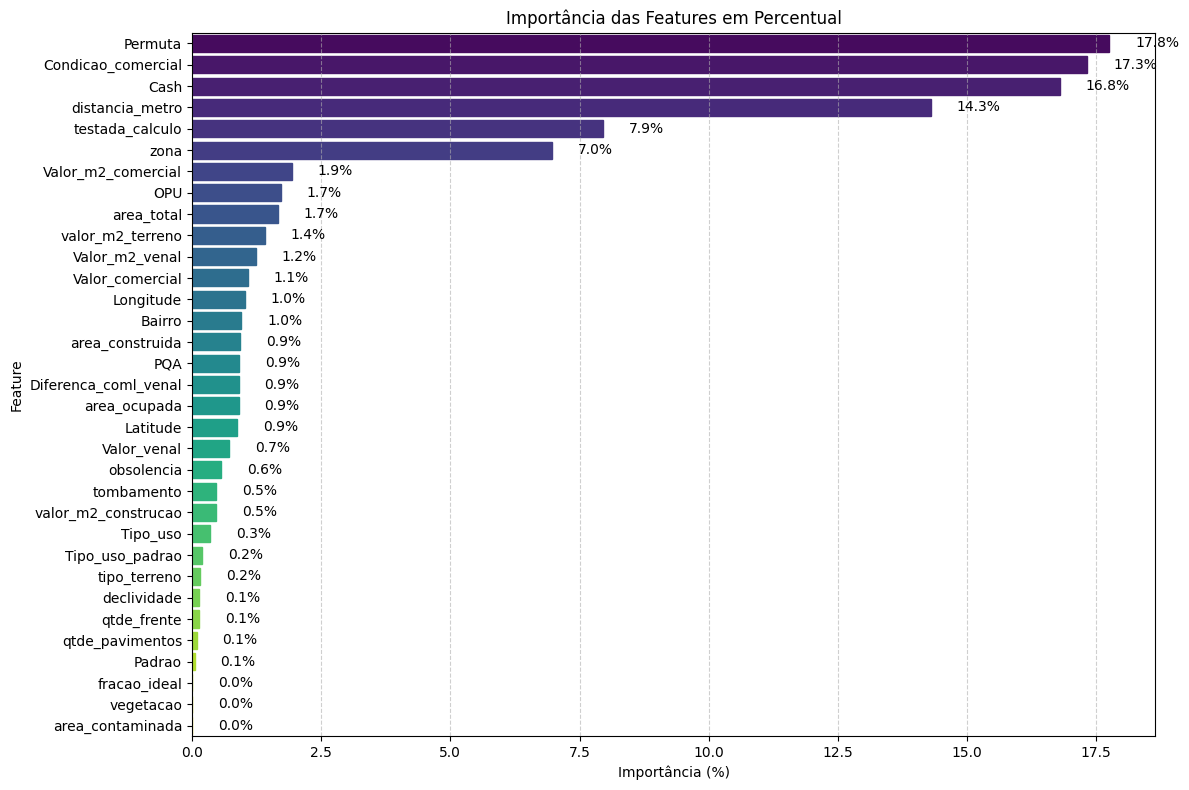

In [ ]:
plot_feature_importance(model_BRF, X_train.columns)

### **Voting Classifier + Optuna**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import optuna

# Função objetivo para otimizar a Regressão Logística
def objective_lr(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga'])

    # Garantir que l1_ratio só é usado se elasticnet for selecionado
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1) if penalty == 'elasticnet' else None

    # Garantir combinações válidas de penalty e solver
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.TrialPruned()
    if penalty == 'elasticnet' and solver != 'saga':
        raise optuna.TrialPruned()
    if penalty is None and solver not in ['lbfgs', 'saga']:
        raise optuna.TrialPruned()

    param = {
        'penalty': penalty,
        'C': trial.suggest_float('C', 0.01, 10.0, log=True),
        'solver': solver,
        'l1_ratio': l1_ratio,
        'max_iter': trial.suggest_int('max_iter', 100, 1000)
    }

    # Criar e avaliar o modelo
    model = LogisticRegression(**param, random_state=RANDOM_STATE)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='recall').mean()

# Otimizar o estudo
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100)


In [ ]:
# Função objetivo para otimizar o Balanced Random Forest
def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0)
    }

    model = BalancedRandomForestClassifier(**param, random_state=RANDOM_STATE)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='recall').mean()

# Função objetivo para otimizar o Gradient Boosting
def objective_gb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
    }

    model = GradientBoostingClassifier(**param, random_state=RANDOM_STATE)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='recall').mean()

# Função objetivo para otimizar a Regressão Logística
def objective_lr(trial):
    param = {
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', 'none']),
        'C': trial.suggest_float('C', 0.01, 10.0, log=True),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga']),
        'l1_ratio': trial.suggest_float('l1_ratio', 0, 1) if 'elasticnet' in trial.params.get('penalty', ['l2']) else None,
        'max_iter': trial.suggest_int('max_iter', 100, 1000)
    }

    # Ajuste para evitar combinações incompatíveis de penalty e solver
    if param['penalty'] == 'l1' and param['solver'] not in ['liblinear', 'saga']:
        raise optuna.TrialPruned()
    if param['penalty'] == 'elasticnet' and param['solver'] != 'saga':
        raise optuna.TrialPruned()
    if param['penalty'] == 'none' and param['solver'] not in ['lbfgs', 'saga']:
        raise optuna.TrialPruned()

    model = LogisticRegression(**param, random_state=RANDOM_STATE)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='recall').mean()

In [ ]:
# Criar e otimizar os estudos
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=100)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100)

In [ ]:
# Melhores hiperparâmetros para os modelos individuais
best_params_rf = study_rf.best_params
best_params_gb = study_gb.best_params
best_params_lr = study_lr.best_params

print(f"Melhores hiperparâmetros para Balanced Random Forest: {best_params_rf}")
print(f"Melhores hiperparâmetros para Gradient Boosting: {best_params_gb}")
print(f"Melhores hiperparâmetros para Regressão Logística: {best_params_lr}")

Melhores hiperparâmetros para Balanced Random Forest: {'n_estimators': 401, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 17, 'max_features': 0.13653247019036585}
Melhores hiperparâmetros para Gradient Boosting: {'n_estimators': 793, 'max_depth': 3, 'learning_rate': 0.15952072652441912, 'subsample': 0.9574826847003101, 'min_samples_split': 12, 'min_samples_leaf': 4}
Melhores hiperparâmetros para Regressão Logística: {'penalty': 'l1', 'solver': 'liblinear', 'C': 1.0687216590594406, 'max_iter': 780}


In [ ]:
# Criando os classificadores individuais otimizados
rf = BalancedRandomForestClassifier(**best_params_rf, random_state=RANDOM_STATE)
gb = GradientBoostingClassifier(**best_params_gb, random_state=RANDOM_STATE)
lr = LogisticRegression(**best_params_lr, random_state=RANDOM_STATE)

In [ ]:
# Criando o Voting Classifier com os modelos otimizados
voting_clf = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('lr', lr)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              BalancedRandomForestClassifier(max_depth=38,
                                                             max_features=0.13653247019036585,
                                                             min_samples_leaf=17,
                                                             min_samples_split=3,
                                                             n_estimators=401,
                                                             random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.15952072652441912,
                                                         min_samples_leaf=4,
                                                         min_samples_split=12,
                                                         n_estimators=793,
                                                         random_state=42,
                                                         subsample=0.9574826847003101)),
                             ('lr',
                              LogisticRegression(C=1.0687216590594406,
                                                 max_iter=780, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

In [ ]:
# Previsão
y_pred_voting = voting_clf.predict(X_test)
y_pred_voting_proba = voting_clf.predict_proba(X_test)[:, 1]

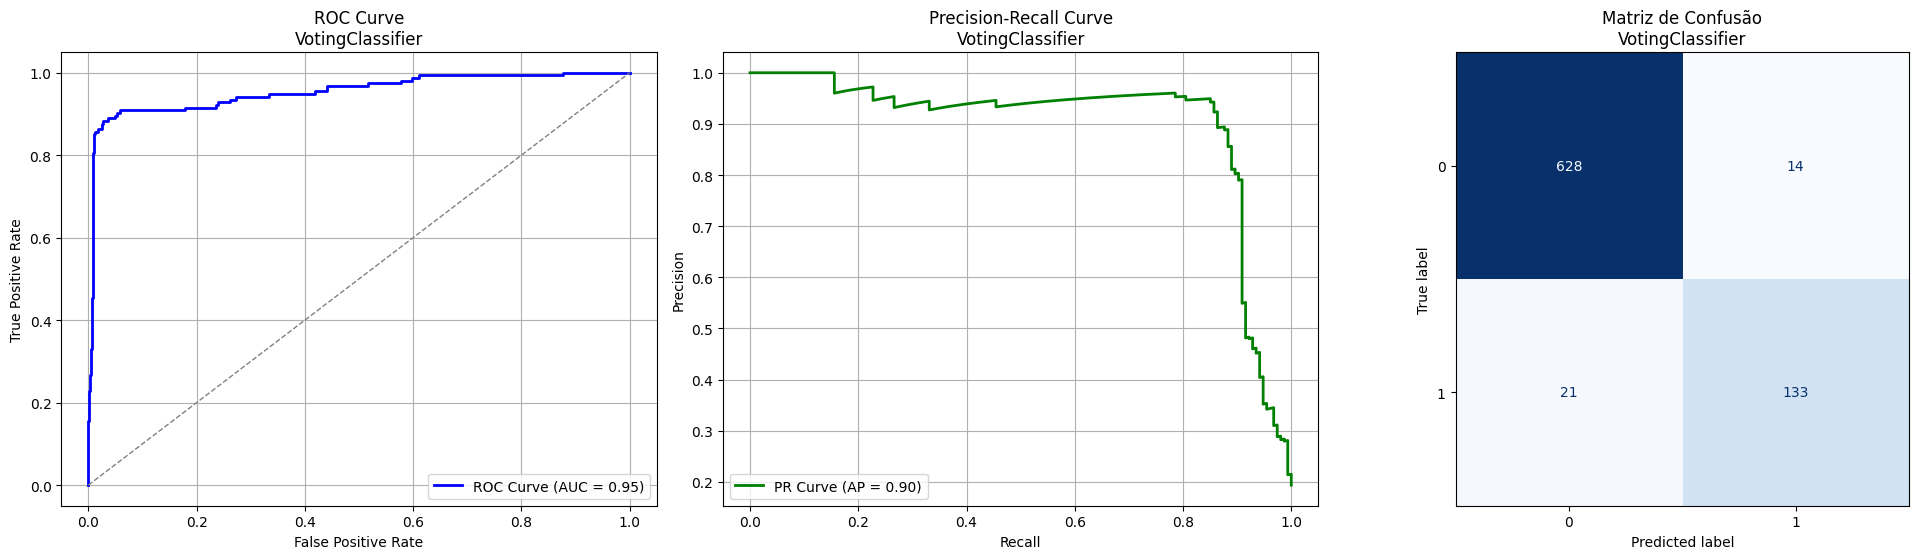


--------------------------------------------------------------------------------



precision    recall  f1-score    support
0              0.967643  0.978193  0.972889  642.00000
1              0.904762  0.863636  0.883721  154.00000
accuracy       0.956030  0.956030  0.956030    0.95603
macro avg      0.936202  0.920915  0.928305  796.00000
weighted avg   0.955477  0.956030  0.955638  796.00000

In [ ]:
# Executar as funções com os dados do modelo
plot_roc_pr_confusion(y_test, y_pred_voting, y_pred_voting_proba, voting_clf)
display_classification_report(y_test, y_pred_voting, voting_clf)

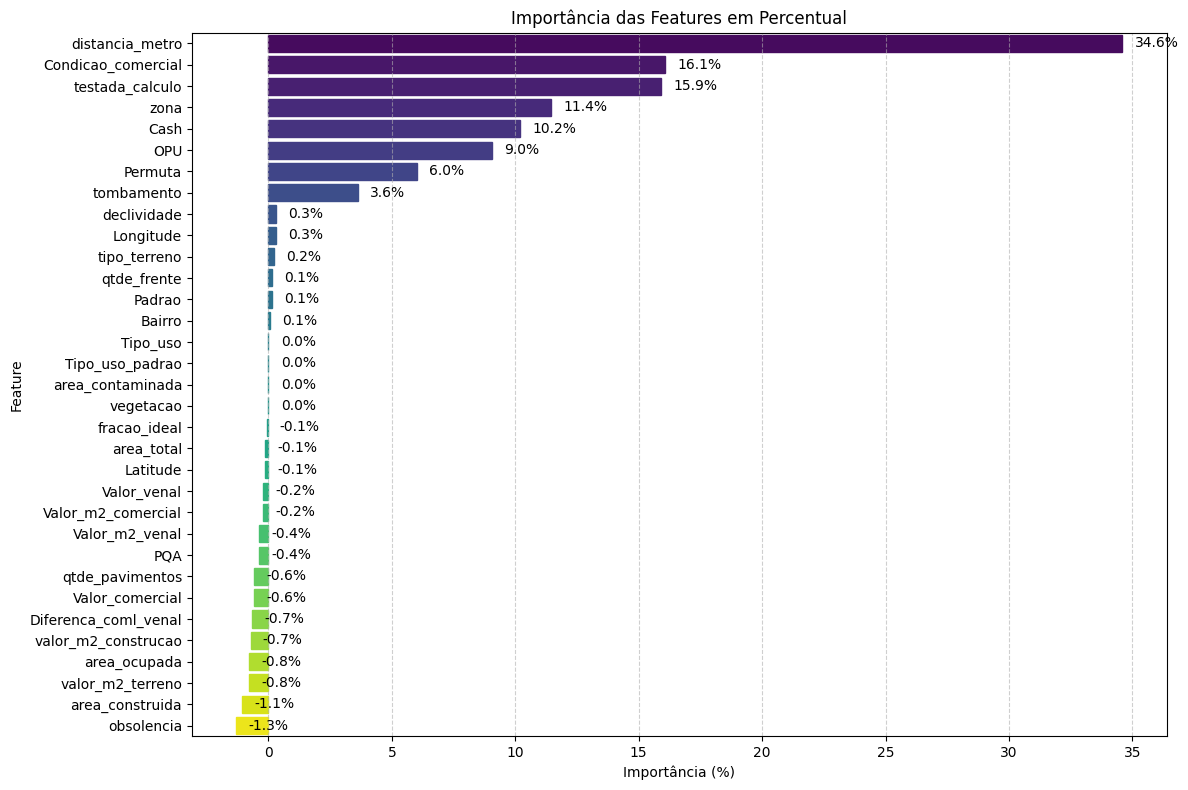

In [ ]:
# Cálculo da importância das features usando Permutation Importance
result = permutation_importance(voting_clf, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, scoring='recall')

#Criar um modelo fictício para simular o atributo feature_importances_
class MockModel:
    def __init__(self, importances):
        self.feature_importances_ = importances

# Criar o mock model com importâncias calculadas
mock_model = MockModel(result.importances_mean)

# Usar a função plot_feature_importance com o mock model
plot_feature_importance(mock_model, feature_names=X.columns, top_n=33)